# Import Library

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from itertools import product
from statsmodels.tsa.arima.model import ARIMA

In [2]:
print(pd.__version__)
print(np.__version__)
print(sns.__version__)

1.4.4
1.21.5
0.11.2


# Load Dataset

In [3]:
df = pd.read_excel('Combined Data.xlsx')

# Mengatur opsi display.max_columns ke None
pd.set_option('display.max_columns', None)

df.sample(5)

Tran  CustomerID       Date ProductID  Price  Qty  TotalAmount  \
2743  TR30981         260 2022-05-15        P8  16000    2        32000   
3028  TR77214         392 2022-07-25       P10  15000    3        45000   
219   TR16232         392 2022-05-24        P6  18000    4        72000   
4584  TR80719         243 2022-03-31        P7   9400    3        28200   
3923  TR67395         328 2022-01-22        P8  16000    3        48000   

      StoreID      StoreName    GroupStore           Type  Latitude  \
2743        8  Sinar Harapan  Harapan Baru  General Trade  5.548290   
3028        9         Lingga        Lingga   Modern Trade -3.654703   
219         1  Prima Tendean         Prima   Modern Trade -6.200000   
4584       13          Buana         Buana  General Trade -1.269160   
3923       11  Sinar Harapan      Prestasi  General Trade  0.533505   

       Longitude  Product Name  Age  Gender Marital Status  Income  
2743   95.323753           Oat   33       0         Single    6.65  
3028  128.190643  Cheese Stick   45       0        Married   19.68  
219   106.816666        Cashew   45       0        Married   19.68  
4584  116.825264  Coffee Candy   38       0        Married    3.34  
3923  101.447403           Oat   36       0        Married   10.53

# Exploratory Data Analysis

## Descriptive Analytics

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5020 entries, 0 to 5019
Data columns (total 18 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   Tran            5020 non-null   object        
 1   CustomerID      5020 non-null   int64         
 2   Date            5020 non-null   datetime64[ns]
 3   ProductID       5020 non-null   object        
 4   Price           5020 non-null   int64         
 5   Qty             5020 non-null   int64         
 6   TotalAmount     5020 non-null   int64         
 7   StoreID         5020 non-null   int64         
 8   StoreName       5020 non-null   object        
 9   GroupStore      5020 non-null   object        
 10  Type            5020 non-null   object        
 11  Latitude        5020 non-null   float64       
 12  Longitude       5020 non-null   float64       
 13  Product Name    5020 non-null   object        
 14  Age             5020 non-null   int64         
 15  Gend

In [10]:
# Counting the number of unique values in each column
unique_counts = df.nunique()

# Applying filtering to columns with less than 10 unique values
filtered_columns = unique_counts[(unique_counts < 10) & (unique_counts > 0)]

# Displaying the number of unique values for the filtered columns
filtered_columns

GroupStore        7
Type              2
Gender            2
Marital Status    2
dtype: int64

In [11]:
# Applying the filter to columns with fewer than 10 unique values
filtered_columns = filtered_columns.index.tolist()

In [12]:
# Displaying the unique values of each column in filtered_columns
for column in filtered_columns:
    unique_values = df[column].unique()
    print(f"Unique values of column '{column}':")
    print(unique_values)
    print()

Unique values of column 'GroupStore':
['Prima' 'Gita' 'Lingga' 'Buana' 'Harapan Baru' 'Prestasi' 'Priangan']

Unique values of column 'Type':
['Modern Trade' 'General Trade']

Unique values of column 'Gender':
[0 1]

Unique values of column 'Marital Status':
['Single' 'Married' nan]



In [14]:
# Separating columns based on data types
object_cols = df.select_dtypes(include=['object']).columns
numeric_cols = df.select_dtypes(include=['int', 'float']).columns

print('Object columns:\n', list(object_cols), '\n')
#print('Date columns:\n', list(date), '\n')
print('Numeric columns:\n', list(numeric_cols))

Object columns:
 ['Tran', 'ProductID', 'StoreName', 'GroupStore', 'Type', 'Product Name', 'Marital Status'] 

Numeric columns:
 ['CustomerID', 'Price', 'Qty', 'TotalAmount', 'StoreID', 'Latitude', 'Longitude', 'Age', 'Gender', 'Income']


In [15]:
# Statistical description of categorical columns
df[object_cols].describe()

Tran ProductID StoreName GroupStore           Type Product Name  \
count      5020      5020      5020       5020           5020         5020   
unique     4908        10        12          7              2           10   
top     TR71313        P5    Lingga      Prima  General Trade     Thai Tea   
freq          3       814       738       1085           2851          814   

       Marital Status  
count            4976  
unique              2  
top           Married  
freq             3779

In [16]:
df.describe()

CustomerID         Price          Qty   TotalAmount      StoreID  \
count  5020.000000   5020.000000  5020.000000   5020.000000  5020.000000   
mean    221.263745   9684.800797     3.644622  32279.482072     7.489841   
std     129.672955   4600.708780     1.855295  19675.462455     4.028502   
min       1.000000   3200.000000     1.000000   7500.000000     1.000000   
25%     108.000000   4200.000000     2.000000  16000.000000     4.000000   
50%     221.000000   9400.000000     3.000000  28200.000000     7.000000   
75%     332.000000  15000.000000     5.000000  47000.000000    11.000000   
max     447.000000  18000.000000    10.000000  88000.000000    14.000000   

          Latitude    Longitude          Age       Gender       Income  
count  5020.000000  5020.000000  5020.000000  5020.000000  5020.000000  
mean     -2.942236   109.600789    40.003586     0.452988     8.623713  
std       4.323225     8.357593    12.834719     0.497835     6.518242  
min      -7.797068    95.323753     0.000000     0.000000     0.000000  
25%      -6.914864   104.756554    30.000000     0.000000     4.220000  
50%      -5.135399   110.370529    39.000000     0.000000     7.720000  
75%       0.533505   114.590111    51.000000     1.000000    10.780000  
max       5.548290   128.190643    72.000000     1.000000    71.300000

## Univariate Analysis

In [21]:
object_cols = object_cols.drop("Tran")


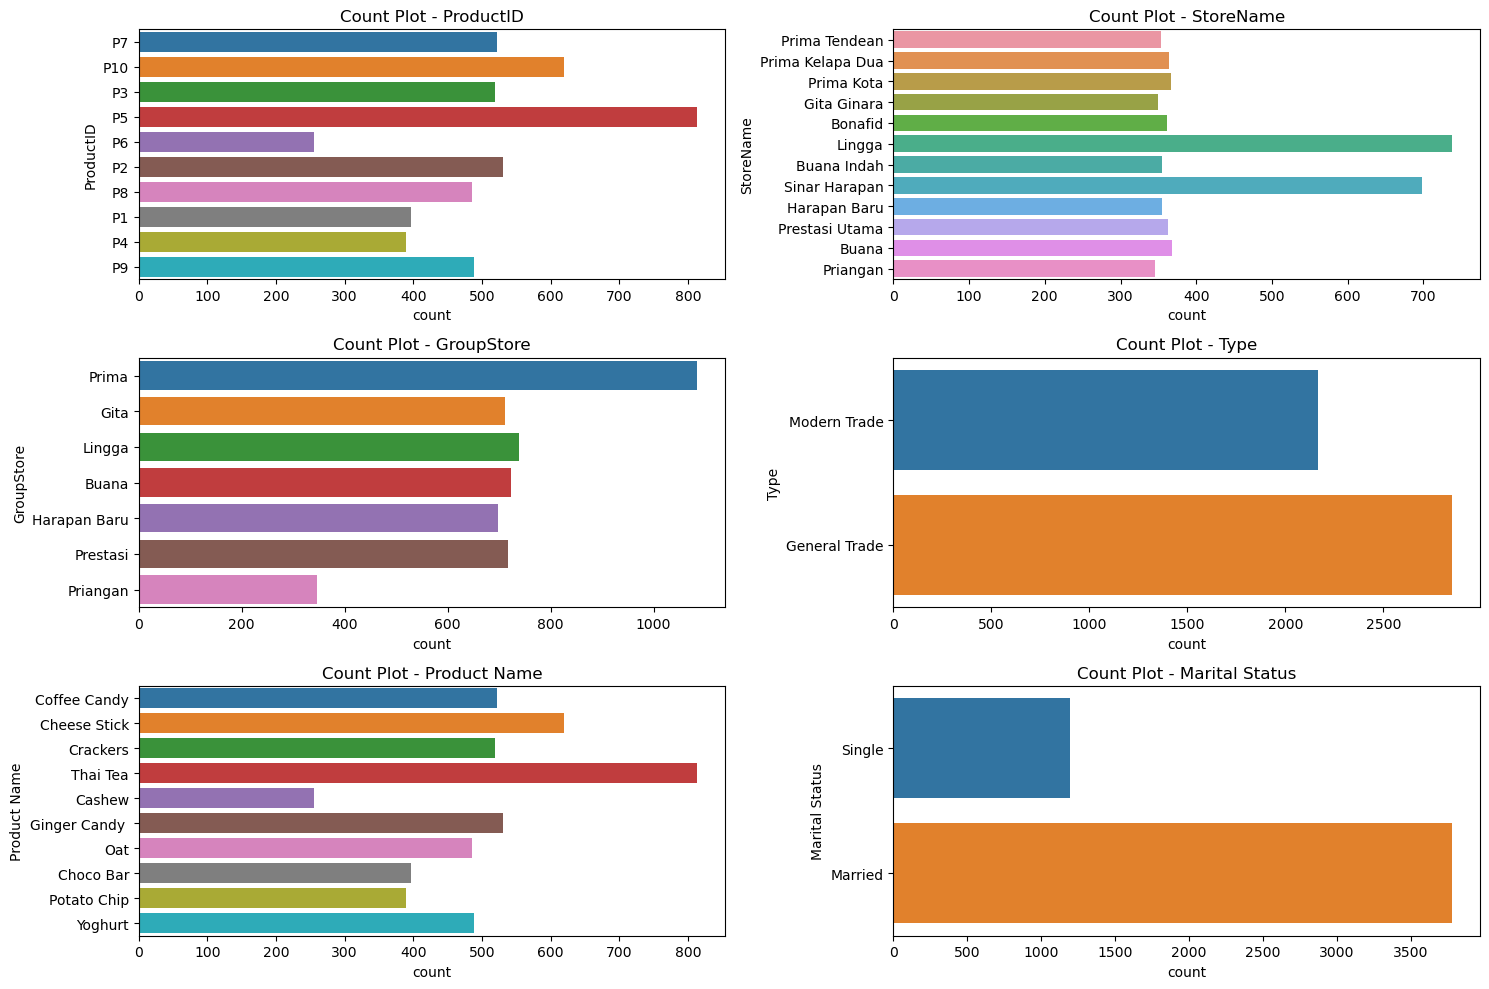

In [22]:
# Determining the number of rows and columns for subplots
num_plots = len(object_cols)
num_cols = 2
num_rows = (num_plots + num_cols - 1) // num_cols

# Creating subplots
fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, 10))

# Setting up a counter for plots
counter = 0

# Creating horizontal count plots for each object column
for row in range(num_rows):
    for col in range(num_cols):
        if counter < num_plots:
            col_name = object_cols[counter]
            sns.countplot(data=df, y=col_name, ax=axes[row, col], orient='h')
            axes[row, col].set_title(f"Count Plot - {col_name}")
            counter += 1
        else:
            # If the counter exceeds the number of object columns, remove the remaining subplot
            fig.delaxes(axes[row, col])

# Adjusting the layout of subplots
plt.tight_layout()

# Displaying the plot
plt.show()

In [23]:
selected_df = df
selected_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5020 entries, 0 to 5019
Data columns (total 18 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   Tran            5020 non-null   object        
 1   CustomerID      5020 non-null   int64         
 2   Date            5020 non-null   datetime64[ns]
 3   ProductID       5020 non-null   object        
 4   Price           5020 non-null   int64         
 5   Qty             5020 non-null   int64         
 6   TotalAmount     5020 non-null   int64         
 7   StoreID         5020 non-null   int64         
 8   StoreName       5020 non-null   object        
 9   GroupStore      5020 non-null   object        
 10  Type            5020 non-null   object        
 11  Latitude        5020 non-null   float64       
 12  Longitude       5020 non-null   float64       
 13  Product Name    5020 non-null   object        
 14  Age             5020 non-null   int64         
 15  Gend

In [29]:
numeric_cols

Index(['CustomerID', 'Price', 'Qty', 'TotalAmount', 'StoreID', 'Latitude',
       'Longitude', 'Age', 'Gender', 'Income'],
      dtype='object')

In [39]:
num_list = ['Qty','TotalAmount','Age','Income']

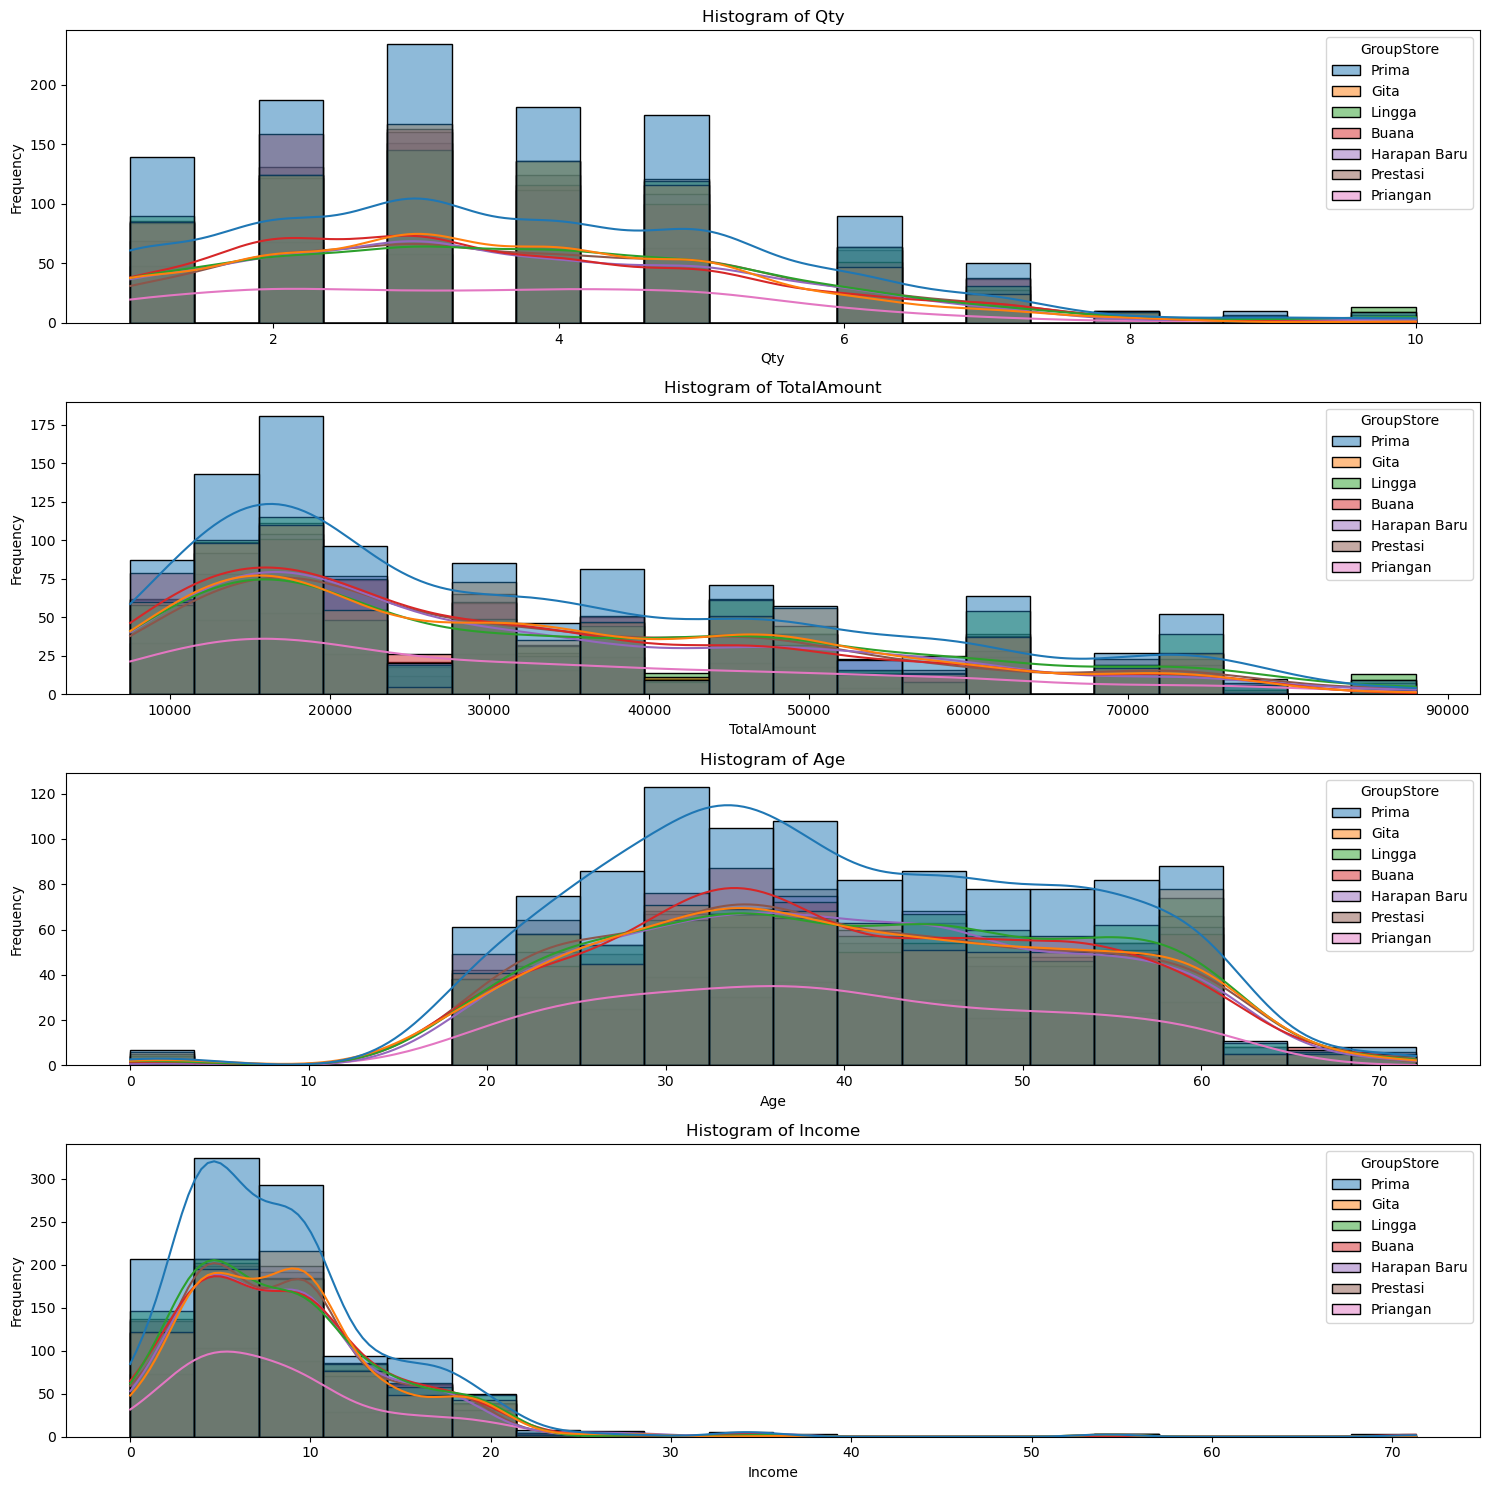

In [60]:
# Calculate the number of rows and columns for the subplot layout
n_rows = len(num_list) // 4 + (len(num_list) % 4 > 0)
n_cols = min(len(num_list), 4)

# Create histograms for each column with a 4-column layout
if n_rows == 1 or n_cols == 1:
    fig, axes = plt.subplots(n_rows * n_cols, figsize=(15, 15))
else:
    fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, 15))

# Determine the number of unused subplots
unused_axes = n_rows * n_cols - len(num_list)

# Hide the unused subplots
if unused_axes > 0:
    for i in range(unused_axes):
        if n_rows == 1 or n_cols == 1:
            axes[-i-1].axis('off')
        else:
            axes[-1, -i-1].axis('off')

# Create histograms for each column
for i, column in enumerate(num_list):
    if n_rows == 1 or n_cols == 1:
        ax = axes[i]
    else:
        ax = axes[i // n_cols, i % n_cols]
    sns.histplot(data=df, x=column, ax=ax, bins=20, hue='GroupStore', kde=True)
    ax.set_xlabel(column)
    ax.set_ylabel("Frequency")
    ax.set_title("Histogram of {}".format(column))

# Adjust the subplot layout
plt.tight_layout()

# Display the plot
plt.show()

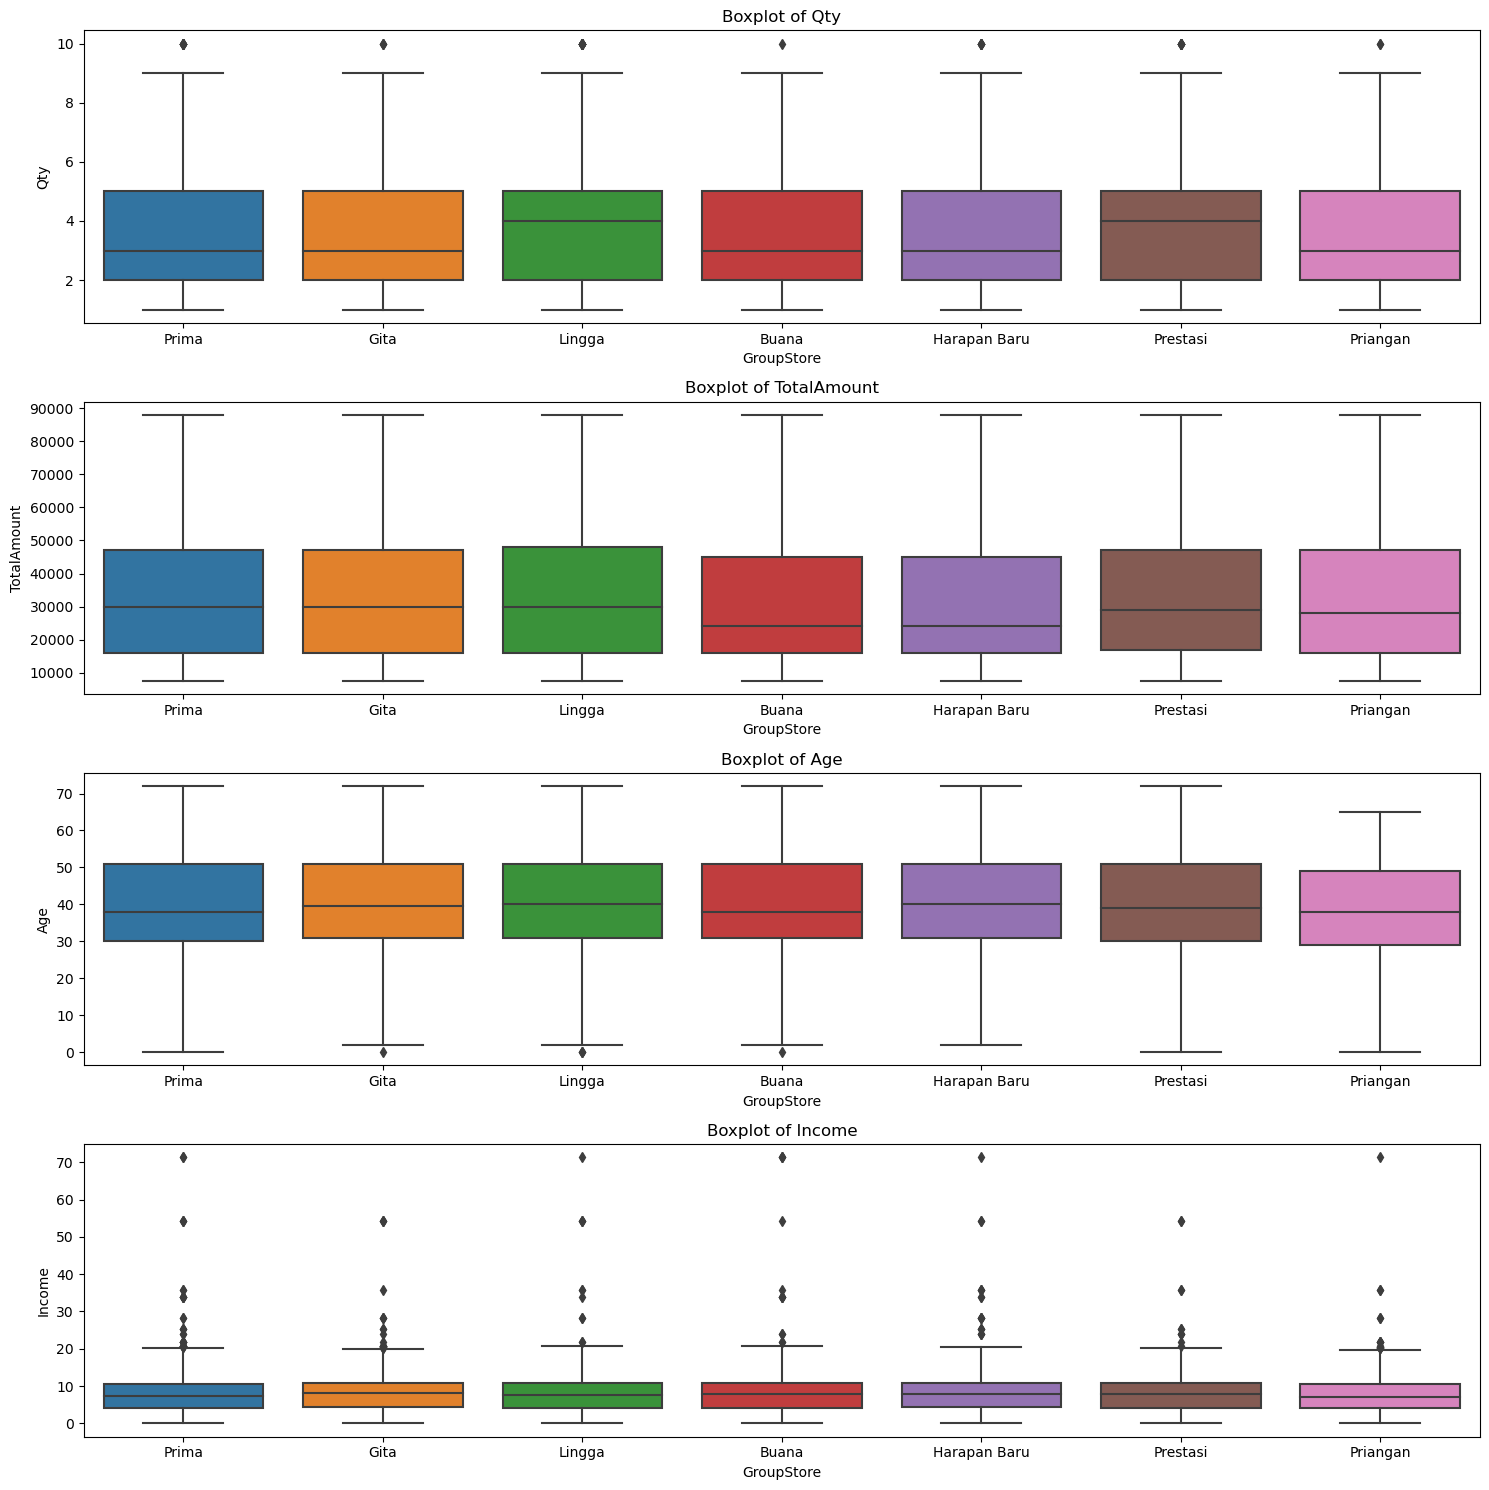

In [61]:
# Calculate the number of rows and columns for the subplot layout
n_rows = len(num_list) // 4 + (len(num_list) % 4 > 0)
n_cols = min(len(num_list), 4)

# Create boxplots for each column with a 4-column layout
if n_rows == 1 or n_cols == 1:
    fig, axes = plt.subplots(n_rows * n_cols, figsize=(15, 15))
else:
    fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, 15))

# Determine the number of unused subplots
unused_axes = n_rows * n_cols - len(num_list)

# Hide the unused subplots
if unused_axes > 0:
    for i in range(unused_axes):
        if n_rows == 1 or n_cols == 1:
            axes[-i-1].axis('off')
        else:
            axes[-1, -i-1].axis('off')

# Create boxplots for each column
for i, column in enumerate(num_list):
    if n_rows == 1 or n_cols == 1:
        ax = axes[i]
    else:
        ax = axes[i // n_cols, i % n_cols]
    sns.boxplot(data=df, x="GroupStore", y=column, ax=ax)
    ax.set_xlabel("GroupStore")
    ax.set_ylabel(column)
    ax.set_title("Boxplot of {}".format(column))

# Adjust the subplot layout
plt.tight_layout()

# Display the plot
plt.show()


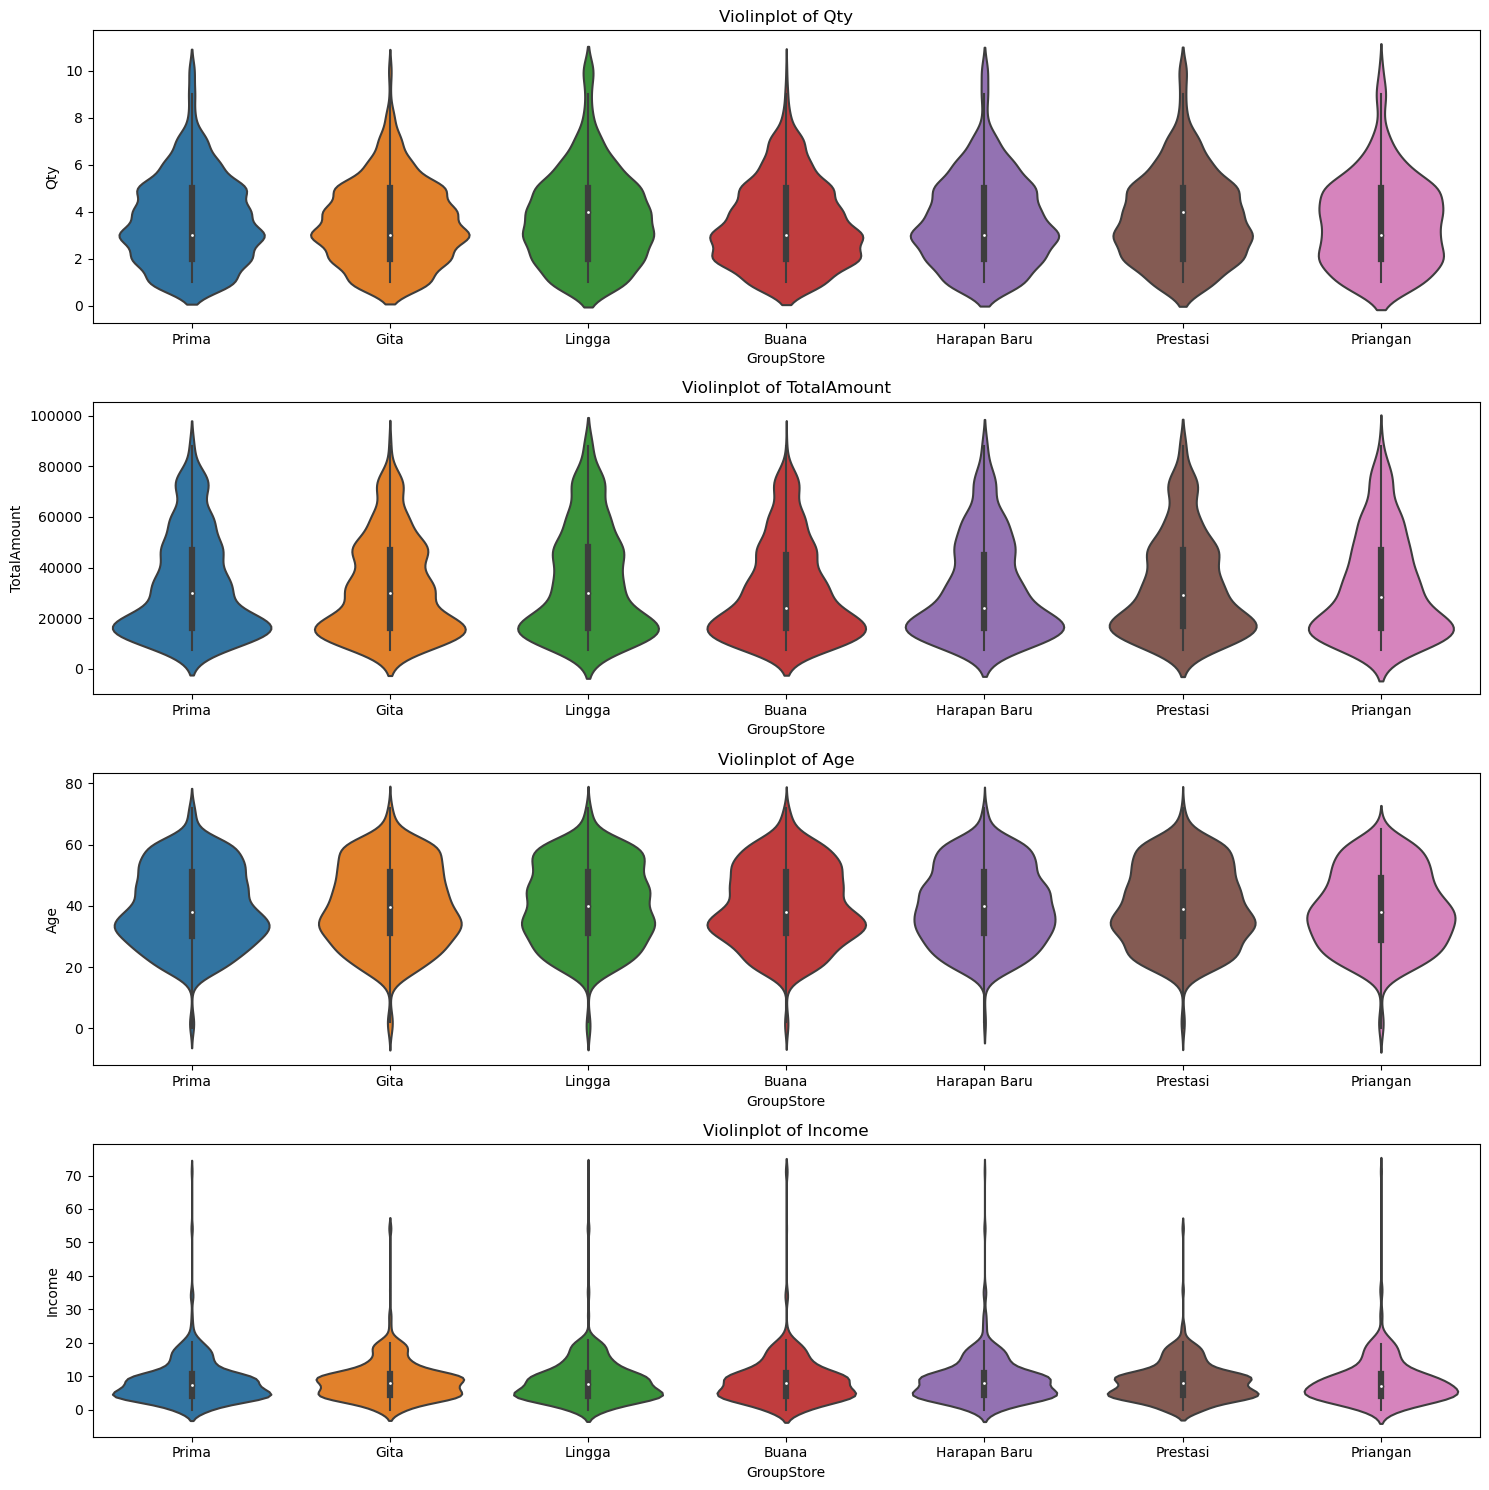

In [63]:
# Calculate the number of rows and columns for the subplot layout
n_rows = len(num_list) // 4 + (len(num_list) % 4 > 0)
n_cols = min(len(num_list), 4)

# Create boxplots for each column with a 4-column layout
if n_rows == 1 or n_cols == 1:
    fig, axes = plt.subplots(n_rows * n_cols, figsize=(15, 15))
else:
    fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, 15))

# Determine the number of unused subplots
unused_axes = n_rows * n_cols - len(num_list)

# Hide the unused subplots
if unused_axes > 0:
    for i in range(unused_axes):
        if n_rows == 1 or n_cols == 1:
            axes[-i-1].axis('off')
        else:
            axes[-1, -i-1].axis('off')

# Create violinlots for each column
for i, column in enumerate(num_list):
    if n_rows == 1 or n_cols == 1:
        ax = axes[i]
    else:
        ax = axes[i // n_cols, i % n_cols]
    sns.violinplot(data=df, x="GroupStore", y=column, ax=ax)
    ax.set_xlabel("GroupStore")
    ax.set_ylabel(column)
    ax.set_title("Violinplot of {}".format(column))

# Adjust the subplot layout
plt.tight_layout()

# Display the plot
plt.show()


## Bivariate Analysis

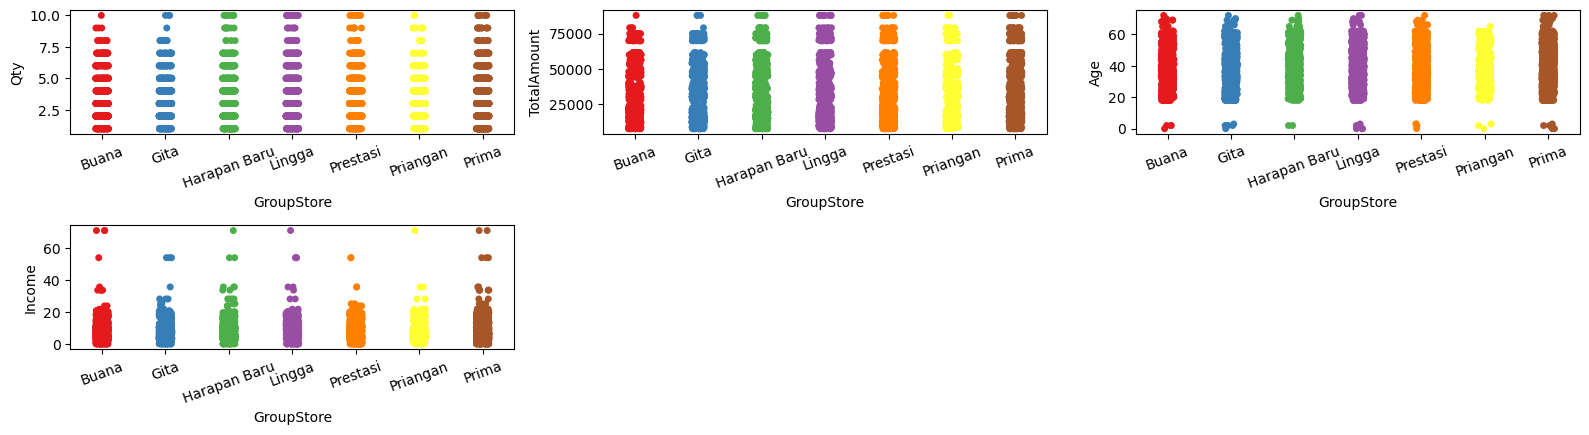

In [66]:

plt.figure(figsize=(16, 8))

for i in range(0, len(num_list)):
    plt.subplot(4, 3, i+1)
    sns.stripplot(x=df['GroupStore'], y=df[num_list[i]],order=sorted(df['GroupStore'].unique()), palette='Set1')
    plt.xticks(rotation=20)
    plt.xlabel('GroupStore')
    plt.ylabel(num_list[i])
    plt.tight_layout()

plt.show()


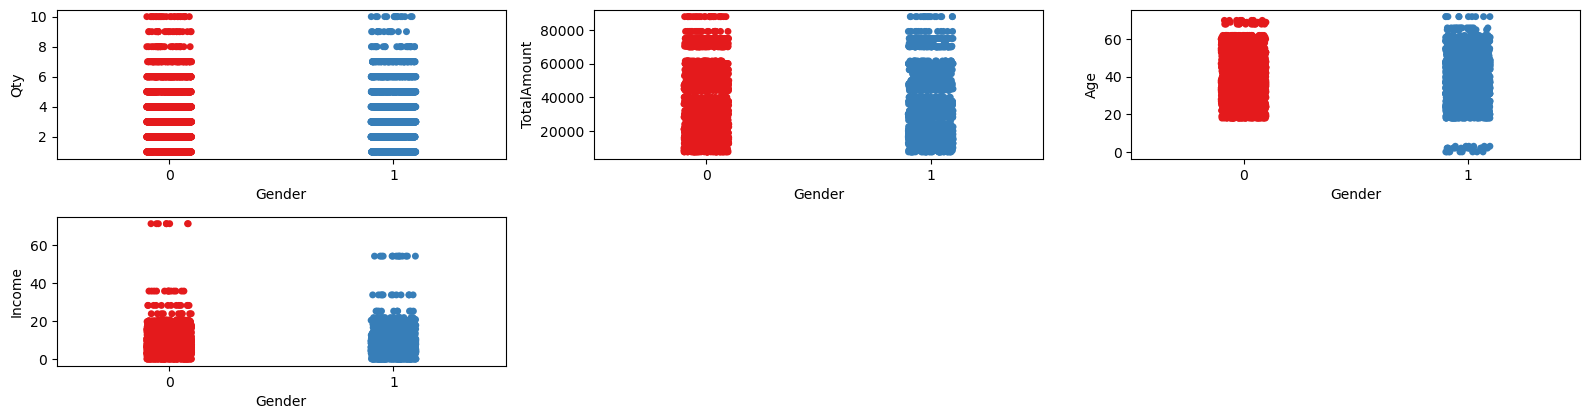

In [70]:

plt.figure(figsize=(16, 8))

for i in range(0, len(num_list)):
    plt.subplot(4, 3, i+1)
    sns.stripplot(x=df['Gender'], y=df[num_list[i]],order=sorted(df['Gender'].unique()), palette='Set1')
    plt.xticks(rotation=0)
    plt.xlabel('Gender')
    plt.ylabel(num_list[i])
    plt.tight_layout()

plt.show()


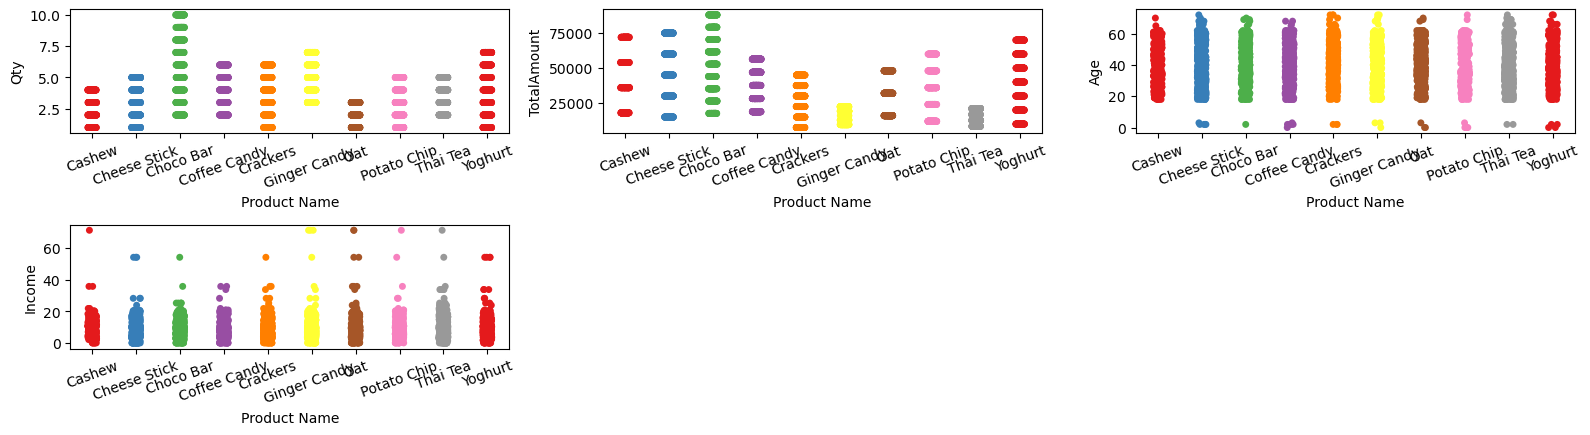

In [74]:
plt.figure(figsize=(16, 8))

for i in range(0, len(num_list)):
    plt.subplot(4, 3, i+1)
    sns.stripplot(x=df['Product Name'], y=df[num_list[i]],order=sorted(df['Product Name'].unique()), palette='Set1')
    plt.xticks(rotation=20)
    plt.xlabel('Product Name')
    plt.ylabel(num_list[i])
    plt.tight_layout()

plt.show()


## Multivariate Analysis

<AxesSubplot:>

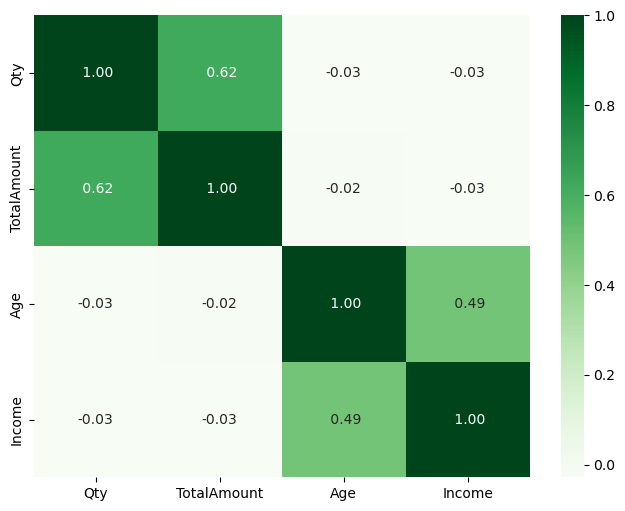

In [75]:
plt.figure(figsize=(8,6))
sns.heatmap(df[num_list].corr(), cmap="Greens", annot=True, fmt=' .2f')

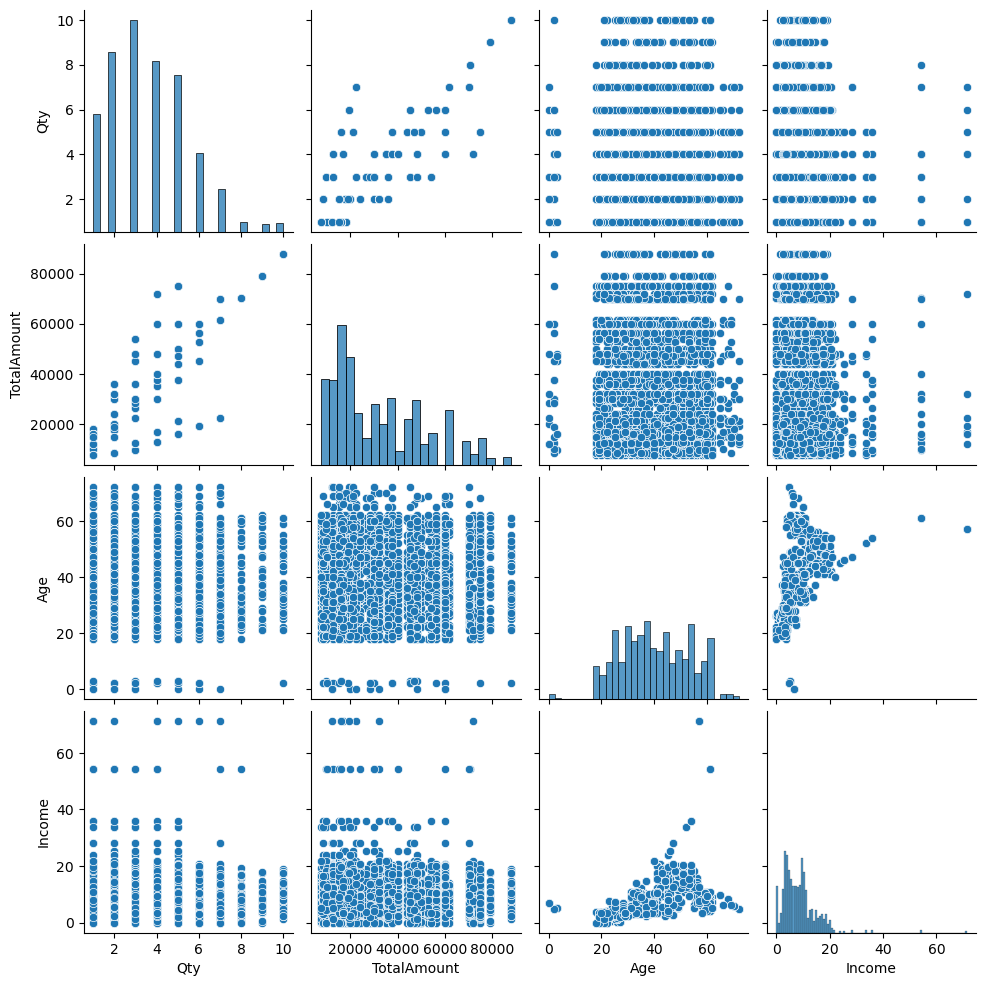

In [40]:
# Create a pair plot of all features based on the cluster results
sns.pairplot(df, vars=num_list)
plt.show()

# Preprocesing

## Missing Values

In [4]:
null_columns = df.columns[df.isnull().any()]
num_null_columns = len(null_columns)

# Display the result
if len(null_columns) > 0:
    print('Number of columns with null values:', num_null_columns)
    print('Kolom-kolom yang memiliki nilai null:', list(null_columns))
else:
    print('Tidak terdapat nilai null pada dataset')

Number of columns with null values: 1
Kolom-kolom yang memiliki nilai null: ['Marital Status']


In [5]:
# Null rows
df[null_columns].isna().sum()

Marital Status    44
dtype: int64

In [6]:
# Calculate the percentage of null values in each column
null_percentage = df[null_columns].isnull().sum() / len(df) * 100

# Display the result
print('Percentage of null values in each column:')
null_percentage


Percentage of null values in each column:


Marital Status    0.876494
dtype: float64

### Handling Missing Value

In [7]:
# Null Column Information
df[null_columns].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5020 entries, 0 to 5019
Data columns (total 1 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Marital Status  4976 non-null   object
dtypes: object(1)
memory usage: 39.3+ KB


In [8]:
# Numerical Null Column Desctriptive Statistics 
df[null_columns].describe()

Marital Status
count            4976
unique              2
top           Married
freq             3779

In [9]:
#Imputatation for Categorical Null Columns
cat_miss = ['Marital Status']
for i in cat_miss:
  mode_columns = df[i].mode().iloc[0]
  df[i] = df[i].fillna(mode_columns)

In [10]:
#Re-Checking Null Columns
df.isna().sum()

Tran              0
CustomerID        0
Date              0
ProductID         0
Price             0
Qty               0
TotalAmount       0
StoreID           0
StoreName         0
GroupStore        0
Type              0
Latitude          0
Longitude         0
Product Name      0
Age               0
Gender            0
Marital Status    0
Income            0
dtype: int64

## Duplicates

In [11]:
duplicates = df.duplicated()

# Count the number of duplicates
num_duplicates = duplicates.sum()

# Display the result
if num_duplicates > 0:
    print('There are {} duplicate rows in the dataset.'.format(num_duplicates))
else:
    print('There are no duplicates in the dataset.')

There are no duplicates in the dataset.


# Time Series

## Data Preparation

In [38]:
# Group by 'date' and sum the 'qty' column
grouped_df = df.groupby('Date')['Qty'].sum().reset_index()
print(grouped_df)

          Date  Qty
0   2022-01-01   49
1   2022-01-02   59
2   2022-01-03   63
3   2022-01-04   45
4   2022-01-05   30
..         ...  ...
360 2022-12-27   70
361 2022-12-28   68
362 2022-12-29   42
363 2022-12-30   44
364 2022-12-31   37

[365 rows x 2 columns]


## Stationary Check

In [39]:
#convert the 'date' column to a pandas datetime type
grouped_df['Date'] = pd.to_datetime(grouped_df['Date'])

#Set the 'date' column as the index of the DataFrame to use it as a time index
grouped_df.set_index('Date', inplace=True)

# Check if the data is stationary (constant mean and variance) using the Augmented Dickey-Fuller test 
from statsmodels.tsa.stattools import adfuller

def check_stationarity(timeseries):
    result = adfuller(timeseries)
    print('ADF Statistic:', result[0])
    print('p-value:', result[1])
    print('Critical Values:')
    for key, value in result[4].items():
        print(f'{key}: {value}')

# Assuming 'qty_sum' is the column you want to forecast
check_stationarity(grouped_df['Qty'])


ADF Statistic: -19.448086319449096
p-value: 0.0
Critical Values:
1%: -3.4484434475193777
5%: -2.869513170510808
10%: -2.571017574266393


### Based on the **Augmented Dickey-Fuller test** results you provided, the **p-value is 0.0, which is less than 0.05 (common significance level)**. This indicates that you can reject the null hypothesis, and the data is stationary after differencing.

## Modeling

                               SARIMAX Results                                
Dep. Variable:                    Qty   No. Observations:                  365
Model:                 ARIMA(1, 1, 1)   Log Likelihood               -1542.558
Date:                Sun, 30 Jul 2023   AIC                           3091.116
Time:                        09:15:50   BIC                           3102.807
Sample:                    01-01-2022   HQIC                          3095.763
                         - 12-31-2022                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.0369      0.047     -0.790      0.430      -0.129       0.055
ma.L1         -0.9853      0.012    -78.994      0.000      -1.010      -0.961
sigma2       278.0866     18.494     15.037      0.0

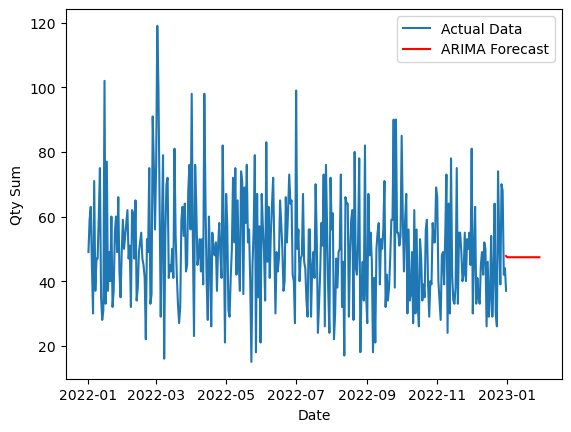

In [12]:
# Group by 'date' and sum the 'qty' column
grouped_df = df.groupby('Date')['Qty'].sum().reset_index()

# Assuming 'Date' column is already converted to datetime, set it as the index of the DataFrame
grouped_df.set_index('Date', inplace=True)

# Infer the frequency from the data and set it explicitly
freq = pd.infer_freq(grouped_df.index)
grouped_df.index.freq = freq

# Define the values of p, d, and q based on your analysis
p = 1
d = 1
q = 1

# Fit the ARIMA model on the stationary data
model = sm.tsa.ARIMA(grouped_df, order=(p, d, q))
results = model.fit()

# Check the summary of the ARIMA model
print(results.summary())

# Make predictions using the ARIMA model
# Assuming you want to make predictions for '7' steps ahead
forecast_steps = 30
forecast = results.forecast(steps=forecast_steps)

# Visualize the original data and the ARIMA forecast
# Plot the original data
plt.plot(grouped_df.index, grouped_df['Qty'], label='Actual Data')

# Plot the ARIMA forecast
forecast_index = pd.date_range(grouped_df.index[-1], periods=forecast_steps, freq=freq)
plt.plot(forecast_index, forecast, label='ARIMA Forecast', color='r')

plt.xlabel('Date')
plt.ylabel('Qty Sum')
plt.legend()
plt.show()

## Tuning Hyperparameter

In [195]:
# Assuming 'grouped_df' is the DataFrame with 'Date' as the index and 'Qty' as the column containing the time series data.

# Manually set the initial parameter values for the SARIMAX model
start_params = [1, 1, 1]  # Set the initial parameters to zeros.

# Data preparation (assuming you have 'grouped_df' as the dataset)
# grouped_df should be a DataFrame with 'Date' as the index and 'Qty' as the column containing the time series data.

# Define the range of p, d, q values to search
p_values = range(0, 3)  # For AR(p) term
d_values = range(0, 3)  # For differencing (I(d))
q_values = range(0, 3)  # For MA(q) term

# Create all possible combinations of p, d, q values
pdq_combinations = list(product(p_values, d_values, q_values))

# Initialize variables to store the best parameters and lowest AIC
best_pdq = None
best_aic = float("inf")

# Perform grid search to find the best parameters
for pdq in pdq_combinations:
    try:
        model = ARIMA(grouped_df['Qty'], order=pdq)
        results = model.fit()

        # Store the parameters if the AIC is lower than the previous best AIC
        if results.aic < best_aic:
            best_pdq = pdq
            best_aic = results.aic

    except Exception as e:
        continue

# Fit the ARIMA model with the best parameters
best_model = ARIMA(grouped_df['Qty'], order=best_pdq)
best_results = best_model.fit()

# Print the best parameters and AIC
print("Best ARIMA Parameters: ", best_pdq)
print("Best AIC: ", best_aic)

# You can now use the 'best_results' to make predictions and evaluate the model.

D:\Program Files\Anaconda\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
D:\Program Files\Anaconda\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
D:\Program Files\Anaconda\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
D:\Program Files\Anaconda\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
D:\Program Files\Anaconda\lib\site-packages

Best ARIMA Parameters:  (0, 1, 1)
Best AIC:  3089.604176997635


                               SARIMAX Results                                
Dep. Variable:                    Qty   No. Observations:                  365
Model:                 ARIMA(0, 1, 1)   Log Likelihood               -1542.802
Date:                Sun, 23 Jul 2023   AIC                           3089.604
Time:                        12:48:49   BIC                           3097.398
Sample:                    01-01-2022   HQIC                          3092.702
                         - 12-31-2022                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -0.9861      0.012    -81.740      0.000      -1.010      -0.962
sigma2       278.4191     18.480     15.066      0.000     242.198     314.640
Ljung-Box (L1) (Q):                   0.61   Jarque-

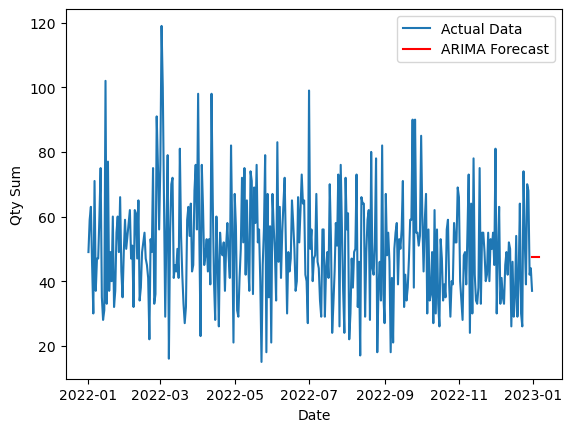

In [222]:
# Group by 'date' and sum the 'qty' column
grouped_df = df.groupby('Date')['Qty'].sum().reset_index()

# Assuming 'Date' column is already converted to datetime, set it as the index of the DataFrame
grouped_df.set_index('Date', inplace=True)

# Infer the frequency from the data and set it explicitly
freq = pd.infer_freq(grouped_df.index)
grouped_df.index.freq = freq

# Define the values of p, d, and q based on your analysis
p = 0
d = 1
q = 1

# Fit the ARIMA model on the stationary data
model = sm.tsa.ARIMA(grouped_df, order=(p, d, q))
results = model.fit()

# Check the summary of the ARIMA model
print(results.summary())

# Make predictions using the ARIMA model
# Assuming you want to make predictions for '7' steps ahead
forecast_steps = 7
forecast = results.forecast(steps=forecast_steps)

# Visualize the original data and the ARIMA forecast
# Plot the original data
plt.plot(grouped_df.index, grouped_df['Qty'], label='Actual Data')

# Plot the ARIMA forecast
forecast_index = pd.date_range(grouped_df.index[-1], periods=forecast_steps, freq=freq)
plt.plot(forecast_index, forecast, label='ARIMA Forecast', color='r')

plt.xlabel('Date')
plt.ylabel('Qty Sum')
plt.legend()
plt.show()

In [75]:
# Create the pivot table
pivot_df = df.pivot_table(index='Date', columns='Product Name', values='Qty', aggfunc='sum')

# Fill NaN values with 0
pivot_df = pivot_df.fillna(0)

pivot_df.sample(5)

Product Name  Cashew  Cheese Stick  Choco Bar  Coffee Candy  Crackers  \
Date                                                                    
2022-04-20       4.0           4.0        2.0           0.0       4.0   
2022-01-11       1.0           5.0        0.0          11.0      13.0   
2022-09-23       0.0           9.0        5.0           5.0       9.0   
2022-09-28       1.0           0.0        6.0           8.0       5.0   
2022-09-19       0.0           2.0        0.0          15.0       0.0   

Product Name  Ginger Candy   Oat  Potato Chip  Thai Tea  Yoghurt  
Date                                                              
2022-04-20             24.0  3.0          2.0       4.0      2.0  
2022-01-11             18.0  3.0          5.0      13.0      6.0  
2022-09-23             16.0  5.0          0.0       8.0      2.0  
2022-09-28              8.0  3.0          0.0      11.0     13.0  
2022-09-19              0.0  0.0          0.0      12.0      5.0

In [76]:
# Set the pivot table as the index of the DataFrame
pdf = pivot_df.reset_index()
pdf.set_index('Date', inplace=True)

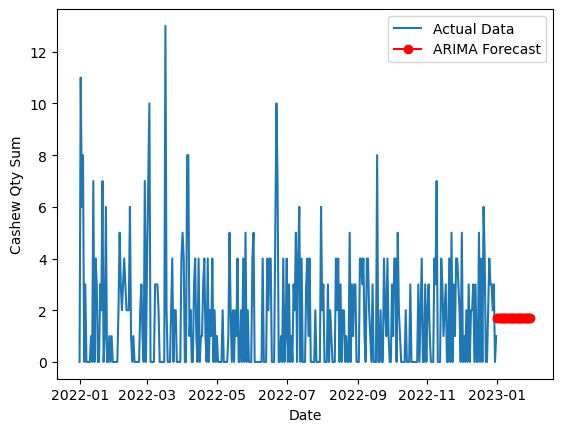

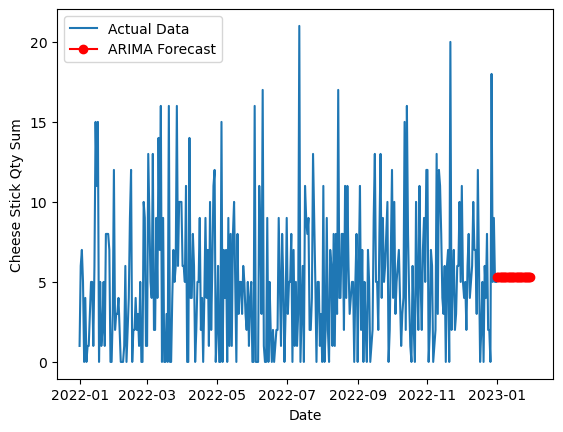

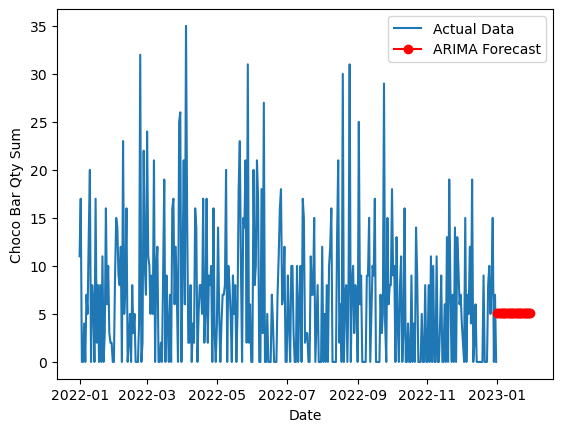

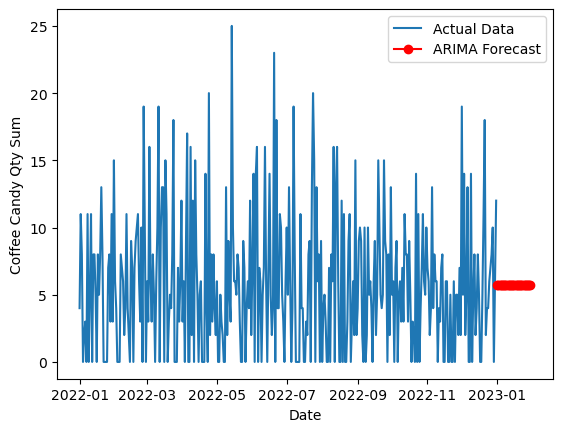

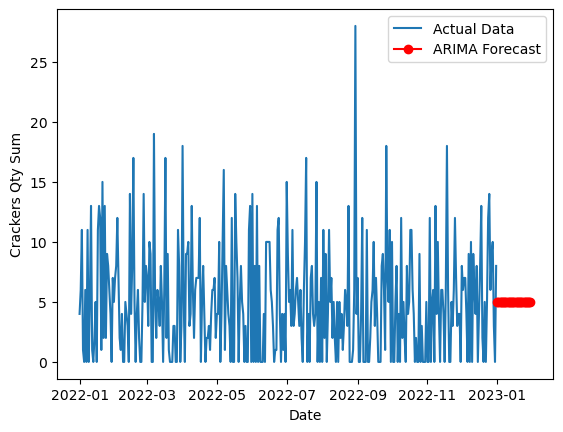

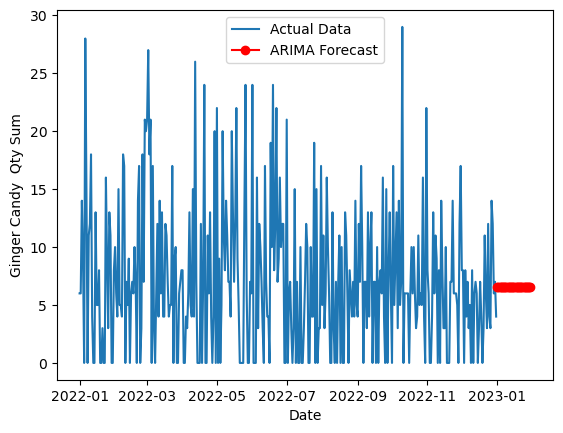

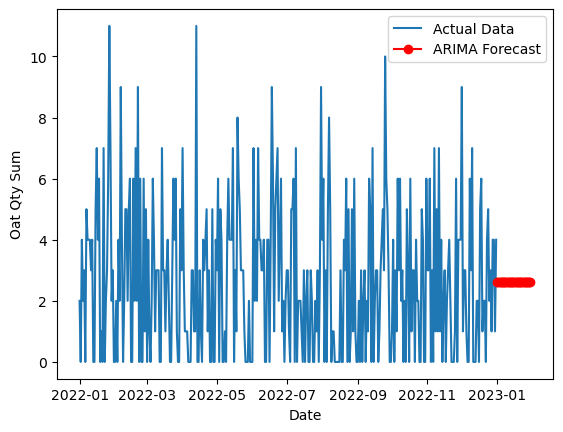

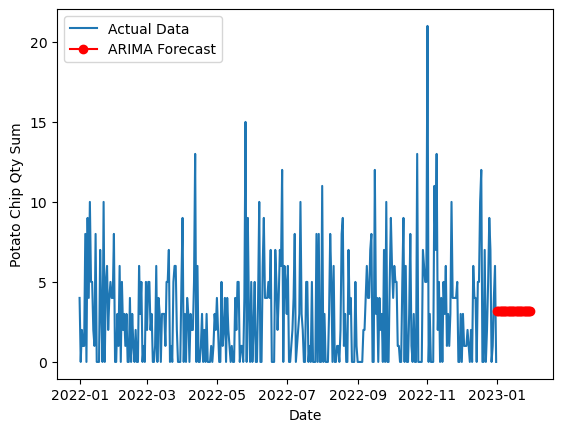

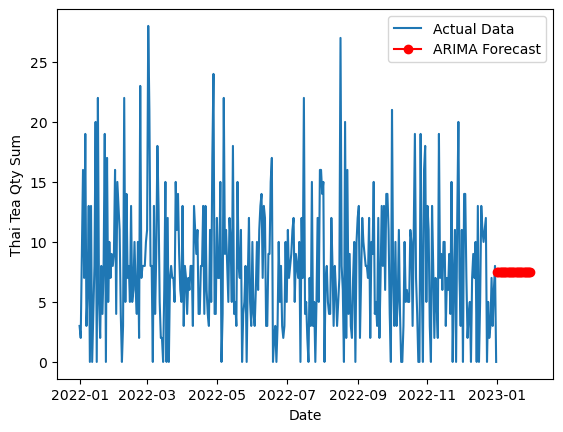

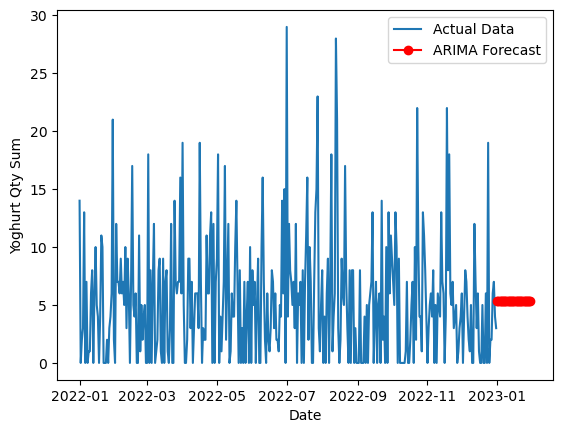

In [79]:
# Loop through each product column and apply ARIMA model
for col in pdf.columns:
    product_data = pdf[col]
    
    # Infer the frequency from the data and set it explicitly
    freq = pd.infer_freq(product_data.index)
    product_data.index.freq = freq
    
    # Define the values of p, d, and q based on your analysis
    p = 0
    d = 1
    q = 1

    # Fit the ARIMA model on the stationary data
    model = sm.tsa.ARIMA(product_data, order=(p, d, q))
    results = model.fit()

    # Make predictions using the ARIMA model
    # Assuming you want to make predictions for '7' steps ahead
    forecast_steps = 30
    forecast = results.forecast(steps=forecast_steps)

    # Visualize the original data and the ARIMA forecast
    # Plot the original data
    plt.plot(product_data.index, product_data.values, label='Actual Data')

    # Plot the ARIMA forecast
    forecast_index = pd.date_range(product_data.index[-1], periods=forecast_steps+1, freq=freq)[1:]
    plt.plot(forecast_index, forecast, label='ARIMA Forecast', color='r', marker='o')

    plt.xlabel('Date')
    plt.ylabel(f'{col} Qty Sum')
    plt.legend()
    plt.show()

# Clutsering

## Data Preparation

In [36]:
# Grouping the data by 'CustomerID' and performing aggregation
df_grouped = df.groupby('CustomerID').agg({
    'Tran': 'count',   # Count of TransactionID per CustomerID
    'Qty': 'sum',               # Sum of Qty per CustomerID
    'TotalAmount': 'sum'        # Sum of Total Amount per CustomerID
}).reset_index()  # Resetting the index to make 'CustomerID' a regular column

In [37]:
df_grouped.sample(10)

CustomerID  Tran  Qty  TotalAmount
199         200     9   22       183200
396         397     7   30       237000
300         301    16   53       615300
179         180     4   19       188200
329         330     9   42       349400
337         338    10   42       305200
90           91     7   32       282800
51           52     7   37       321400
265         266    10   40       292500
354         355    11   33       329200

## Modeling

D:\Program Files\Anaconda\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


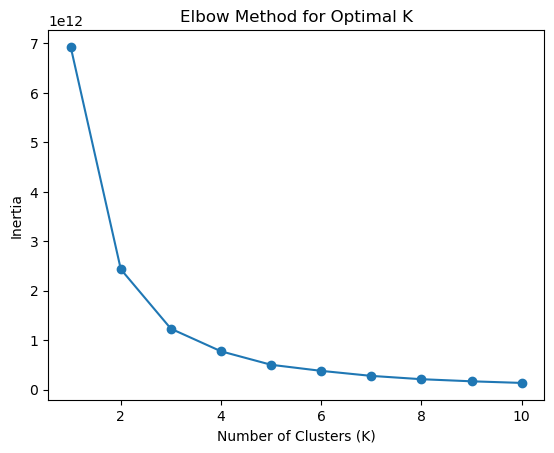

In [19]:
import os
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Set the environment variable OMP_NUM_THREADS
os.environ['OMP_NUM_THREADS'] = '2'

# Extract the relevant columns for clustering
X = df_grouped[['Tran', 'Qty', 'TotalAmount']].values

# Create an empty list to store the inertia values (Sum of squared distances to the closest centroid)
inertia = []

# Try different values of K (number of clusters) from 1 to 10
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X)
    inertia.append(kmeans.inertia_)
    
# Plot the inertia values to find the optimal K
plt.plot(range(1, 11), inertia, marker='o')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Inertia')
plt.title('Elbow Method for Optimal K')
plt.show()


Optimal K: 2


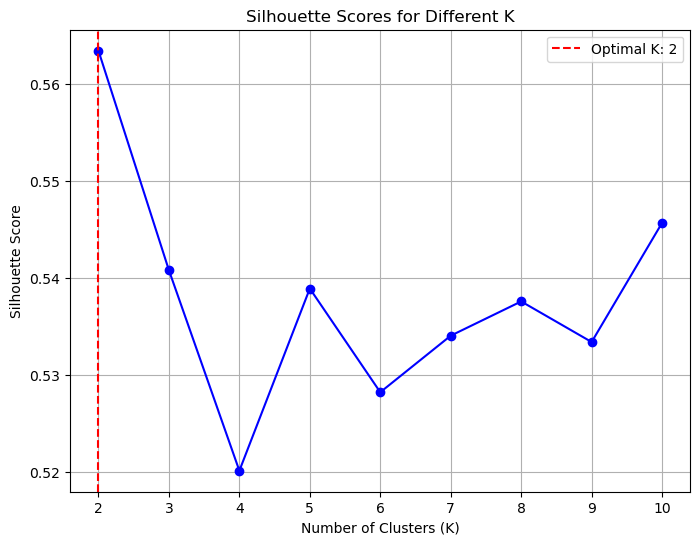

In [29]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score
import matplotlib.pyplot as plt

# Extract the relevant columns for clustering
X = df_grouped[['Tran', 'Qty', 'TotalAmount']].values

# Create lists to store the silhouette scores for each K
k_values = range(2, 11)
silhouette_scores = []

# Loop through each K value and calculate the silhouette score
for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X)
    labels = kmeans.labels_
    silhouette_scores.append(silhouette_score(X, labels))

# Find the K value with the highest Silhouette Score
optimal_k = k_values[silhouette_scores.index(max(silhouette_scores))]
print(f"Optimal K: {optimal_k}")

# Plot the Silhouette Scores for different K values
plt.figure(figsize=(8, 6))
plt.plot(k_values, silhouette_scores, marker='o', linestyle='-', color='b')
plt.axvline(x=optimal_k, color='red', linestyle='--', label=f'Optimal K: {optimal_k}')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Scores for Different K')
plt.xticks(k_values)
plt.grid(True)
plt.legend()
plt.show()


Silhouette Score for K=2: 0.5634481519346806


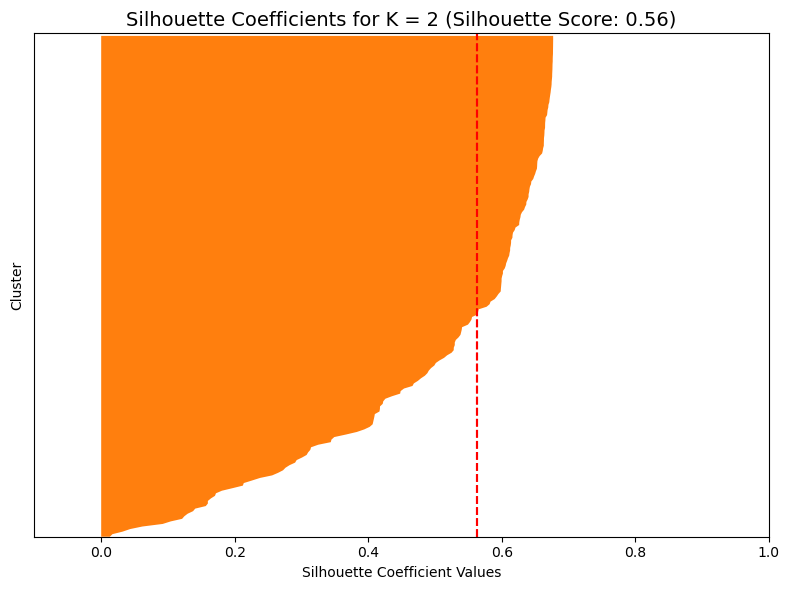

In [32]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score
import matplotlib.pyplot as plt

# Extract the relevant columns for clustering
X = df_grouped[['Tran', 'Qty', 'TotalAmount']].values

# Set K to 2 (number of clusters)
k = 2

# Create the KMeans model
kmeans = KMeans(n_clusters=k, random_state=42)
kmeans.fit(X)
labels = kmeans.labels_

# Calculate the Silhouette Score for K = 2
silhouette_avg = silhouette_score(X, labels)
print(f"Silhouette Score for K=2: {silhouette_avg}")

# Calculate the Silhouette Coefficients for each data point
silhouette_values = silhouette_samples(X, labels)

# Plot the Silhouette Coefficients for K = 2
plt.figure(figsize=(8, 6))
y_lower = 5
for i in range(k):
    cluster_silhouette_values = silhouette_values[labels == i]
    cluster_silhouette_values.sort()
    y_upper = y_lower + cluster_silhouette_values.shape[0]
    plt.fill_betweenx(range(y_lower, y_upper), 0, cluster_silhouette_values)
    plt.axvline(x=silhouette_avg, color='red', linestyle='--')
    plt.yticks([])
    plt.xlim(-0.1, 1)
    plt.ylim(y_lower, y_upper)
    y_lower = y_upper + 5

plt.title(f"Silhouette Coefficients for K = 2 (Silhouette Score: {silhouette_avg:.2f})", fontsize=14)
plt.xlabel("Silhouette Coefficient Values")
plt.ylabel("Cluster")
plt.tight_layout()
plt.show()

In [34]:
# Let's say the optimal K is 3 (from the elbow method plot)
kmeans = KMeans(n_clusters=2, random_state=42)

# Fit the K-Means model to the data
kmeans.fit(X)

# Get the cluster assignments for each data point
df_grouped['Cluster'] = kmeans.labels_

## Analysis

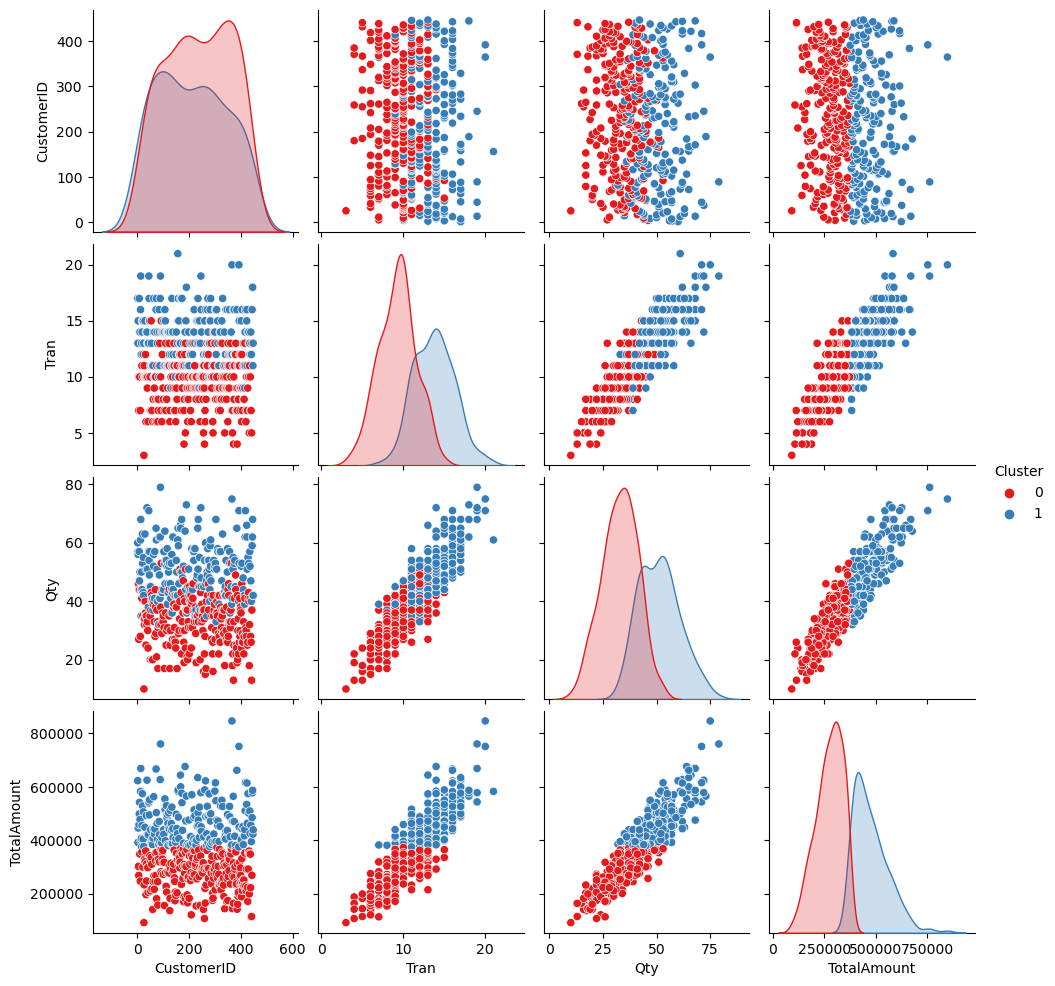

In [35]:
# Create the pair plot with hue='Cluster'
sns.pairplot(df_grouped, hue='Cluster', palette='Set1')
plt.show()

# Splitting Data Into 

In [34]:
# X is the dataframe containing the features (columns) of the data
X = df_encoded[selected_columns].drop('approval_status', axis=1)

# y is the dataframe containing the target (labels) of the data
y = df_encoded['approval_status']

## Standardization

In [35]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Analaysis

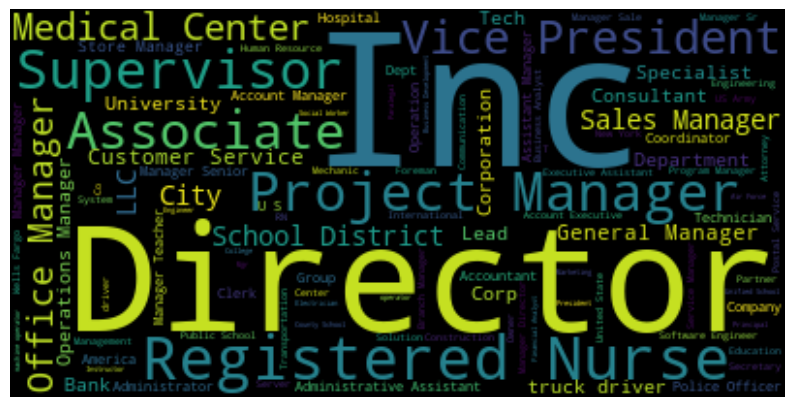

In [135]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Generate the word cloud
wordcloud = WordCloud().generate(' '.join(emp for emp in df.emp_title if pd.notnull(emp)))

# Create a figure and plot the word cloud
plt.figure(figsize=(10, 15))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")

# Display the word cloud
plt.show()


In [117]:
selected_columns =  ['grade','term', 'home_ownership', 'verification_status', 'pymnt_plan', 'initial_list_status', 'application_type','loan_grade']

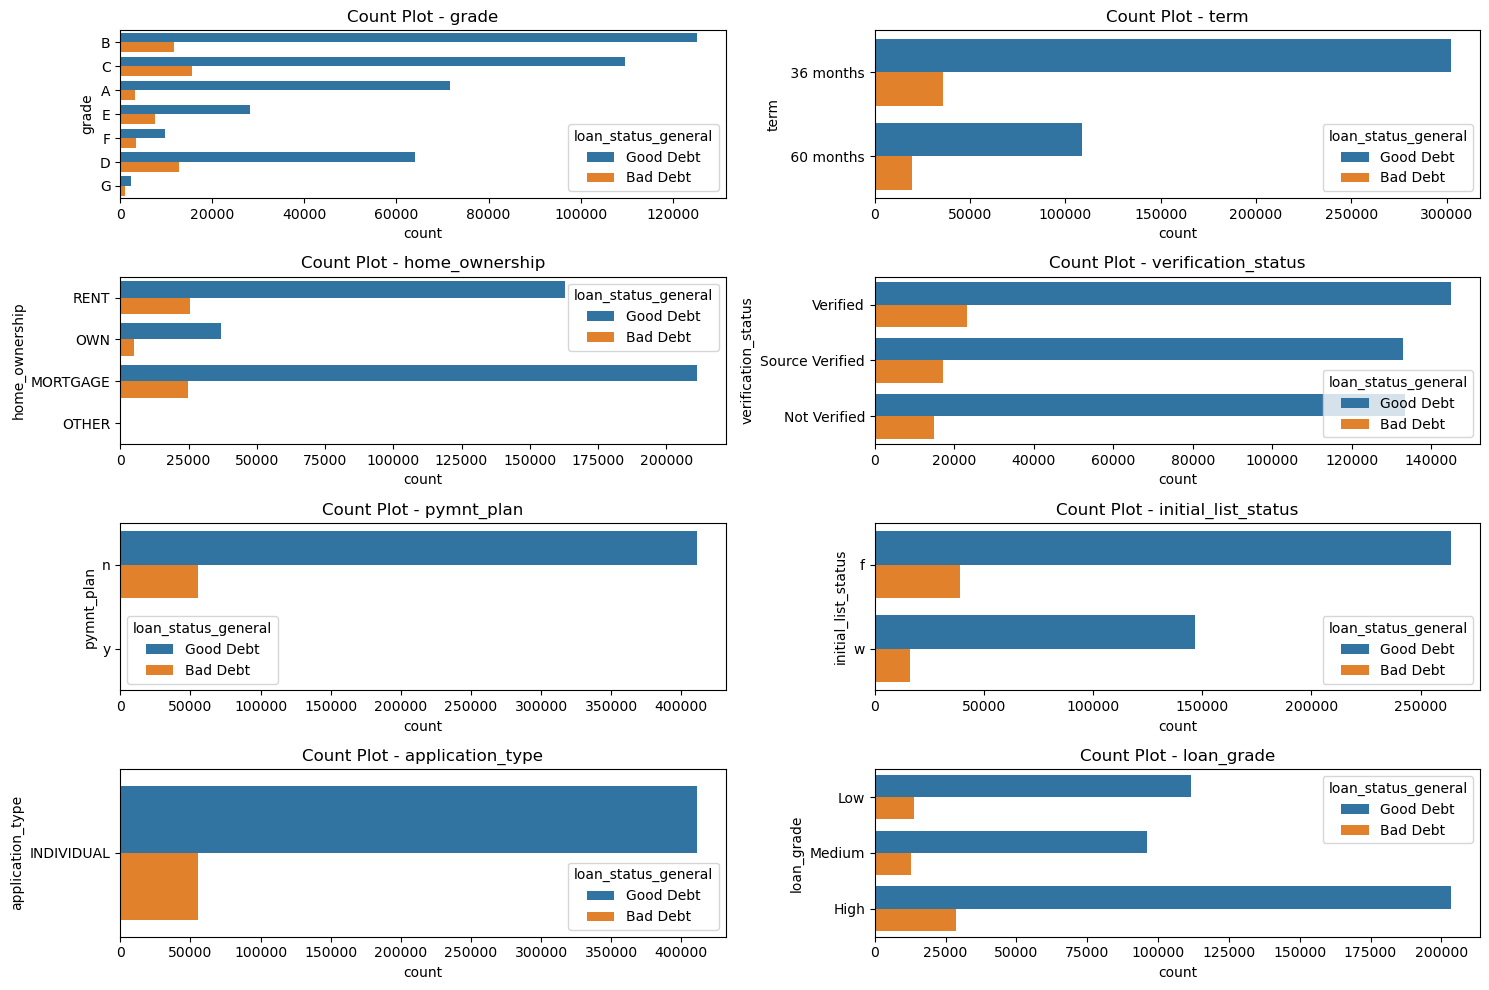

In [118]:
# Determining the number of rows and columns for subplots
num_plots = len(selected_columns)
num_cols = 2
num_rows = (num_plots + num_cols - 1) // num_cols

# Creating subplots
fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, 10))

# Setting up a counter for plots
counter = 0

# Creating horizontal count plots for each object column
for row in range(num_rows):
    for col in range(num_cols):
        if counter < num_plots:
            col_name = selected_columns[counter]
            sns.countplot(data=df, y=col_name, ax=axes[row, col], orient='h', hue='loan_status_general')
            axes[row, col].set_title(f"Count Plot - {col_name}")
            counter += 1
        else:
            # If the counter exceeds the number of object columns, remove the remaining subplot
            fig.delaxes(axes[row, col])

# Adjusting the layout of subplots
plt.tight_layout()

# Displaying the plot
plt.show()


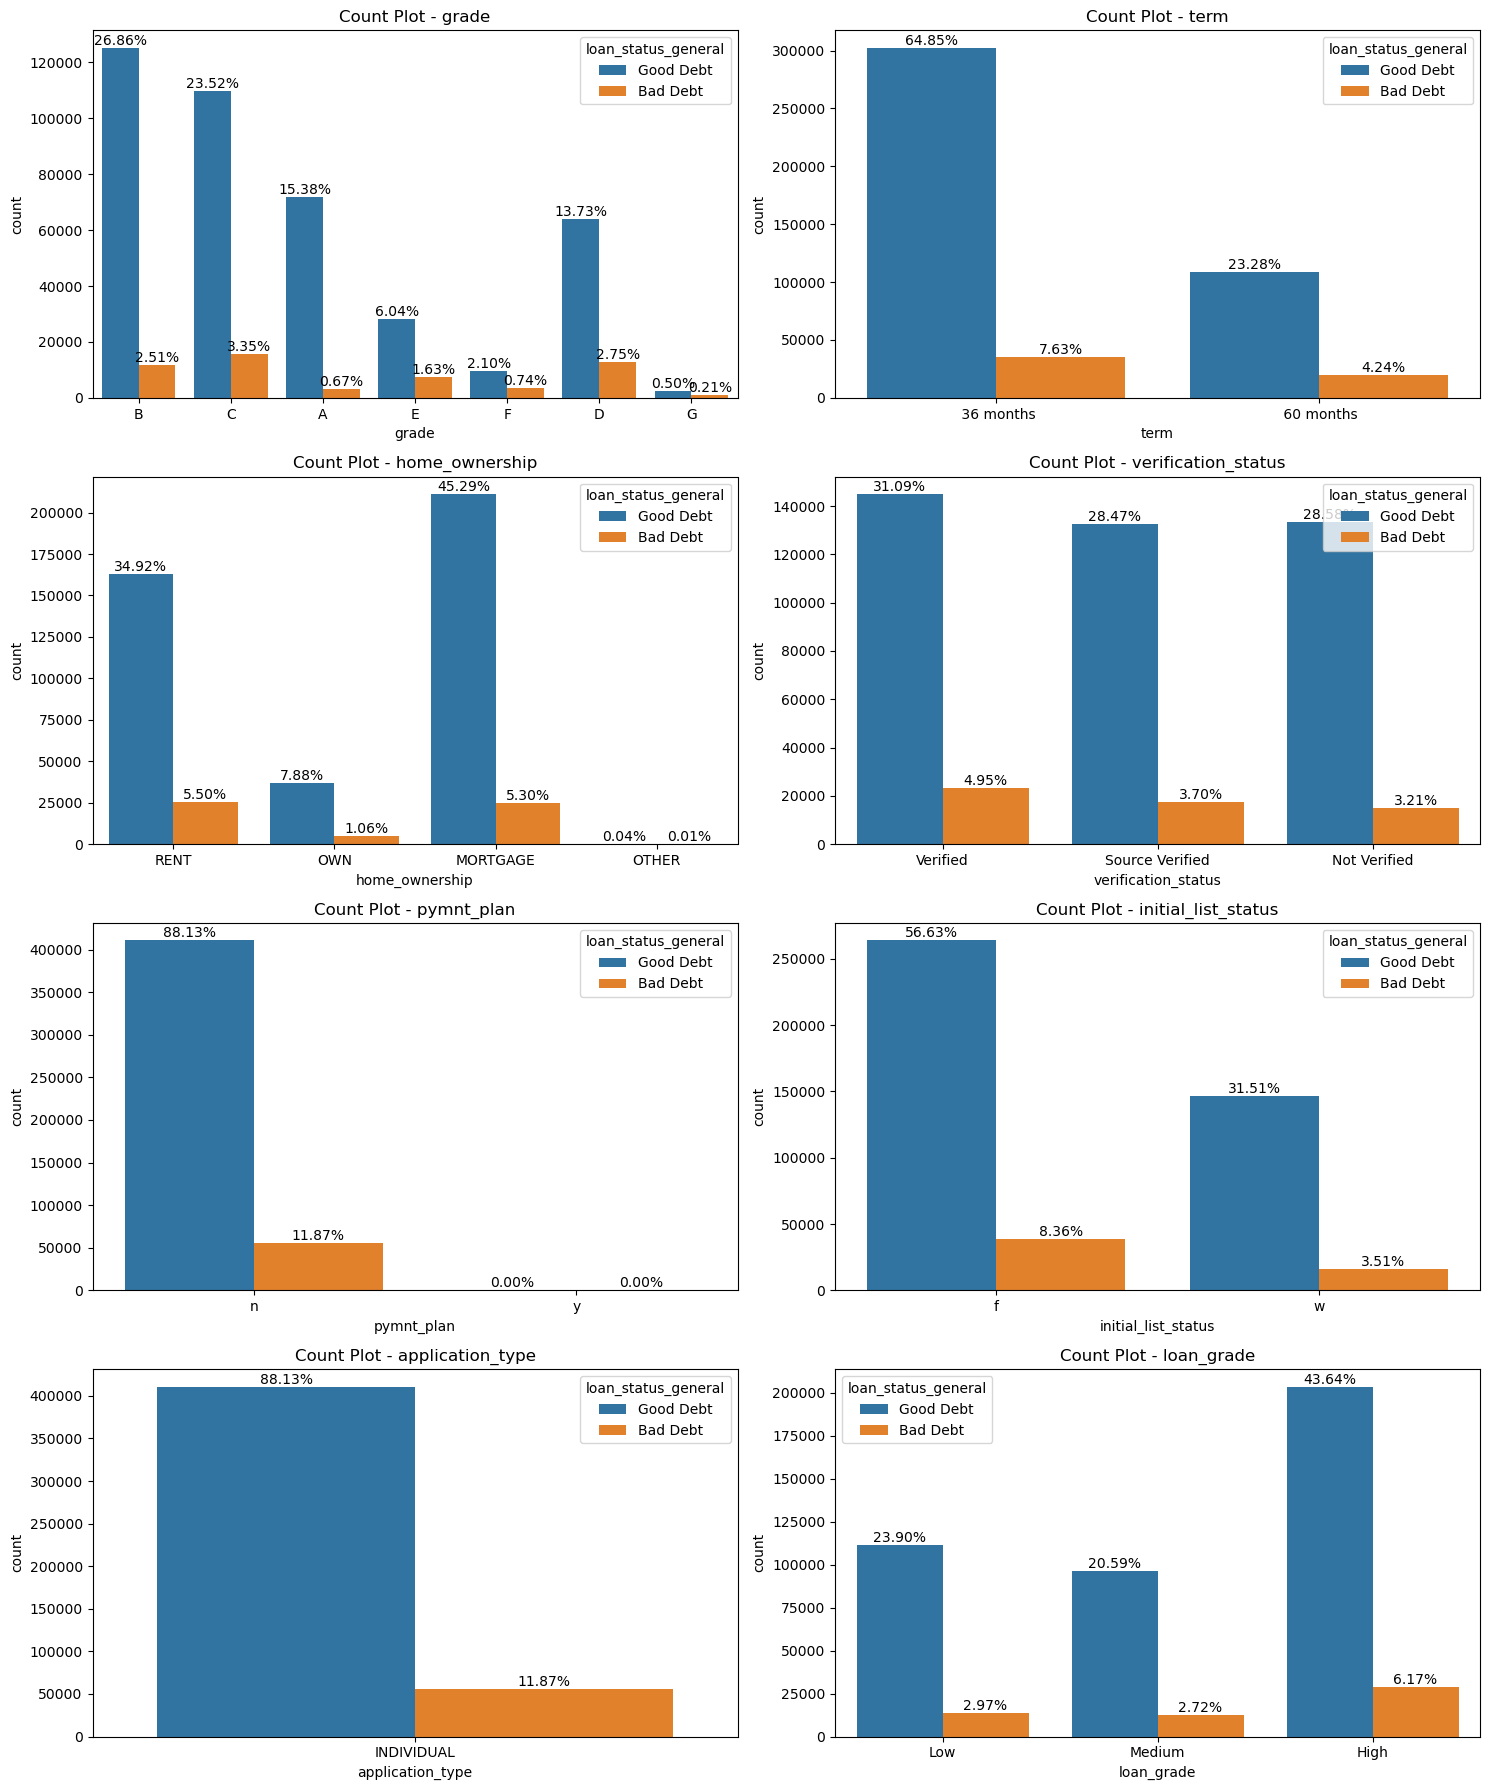

In [119]:
# Determining the number of rows and columns for subplots
num_plots = len(selected_columns)
num_cols = 2
num_rows = (num_plots + num_cols - 1) // num_cols

# Creating subplots
fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, 18))

# Setting up a counter for plots 
counter = 0

# Creating horizontal count plots for each object column
for row in range(num_rows):
    for col in range(num_cols):
        if counter < num_plots:
            col_name = selected_columns[counter]
            ax = sns.countplot(data=df, x=col_name, ax=axes[row, col], hue='loan_status_general')
            ax.set_title(f"Count Plot - {col_name}")
            total = len(df[df[col_name].notna()])  # Exclude missing values
            for p in ax.patches:
                width = p.get_width()
                height = p.get_height()
                x, y = p.get_xy() 
                percentage = height / total * 100
                ax.annotate(f'{percentage:.2f}%', (x + width/2, y + height), ha='center', va='bottom')
            counter += 1
        else:
            # If the counter exceeds the number of object columns, remove the remaining subplot
            fig.delaxes(axes[row, col])

# Adjusting the layout of subplots
plt.tight_layout()

# Displaying the plot
plt.show()


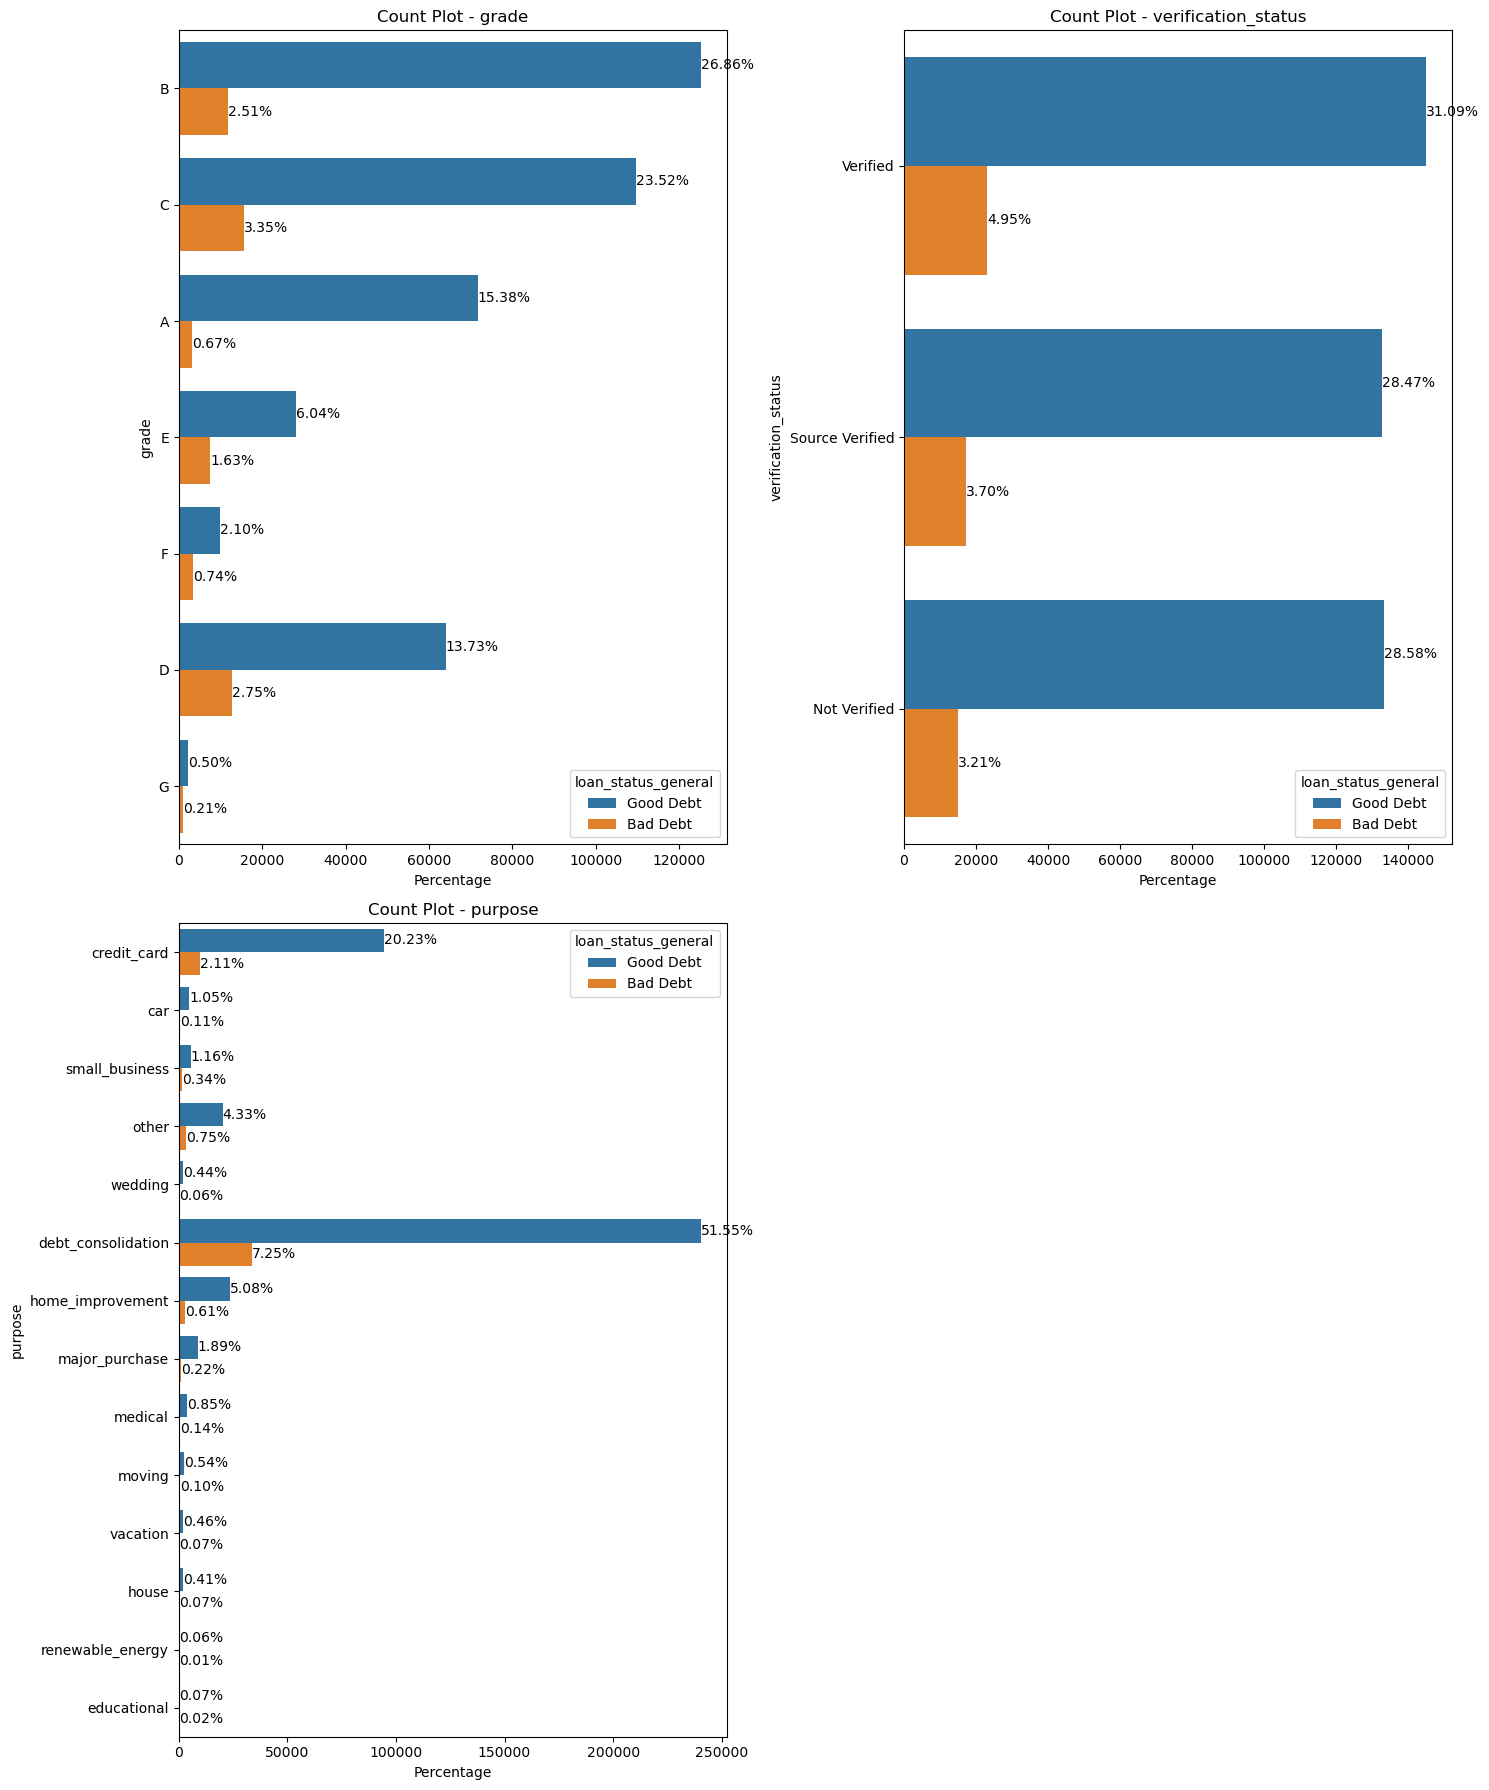

In [44]:
import matplotlib.pyplot as plt
import seaborn as sns

selected_columns = ['grade', 'verification_status', 'purpose']

num_plots = len(selected_columns)
num_cols = 2
num_rows = (num_plots + num_cols - 1) // num_cols

# Creating subplots
fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, 18))

# Setting up a counter for plots
counter = 0

# Creating horizontal count plots for each object column
for row in range(num_rows):
    for col in range(num_cols):
        if counter < num_plots:
            col_name = selected_columns[counter]
            ax = sns.countplot(data=df, y=col_name, ax=axes[row, col], hue='loan_status_general')
            ax.set_title(f"Count Plot - {col_name}")
            total = len(df[df[col_name].notna()])  # Exclude missing values
            for p in ax.patches:
                width = p.get_width()
                height = p.get_height()
                x, y = p.get_xy()
                percentage = width / total * 100
                ax.annotate(f'{percentage:.2f}%', (width, y + height / 2), va='center')
            ax.set_xlabel('Percentage')
            counter += 1
        else:
            # If the counter exceeds the number of object columns, remove the remaining subplot
            fig.delaxes(axes[row, col])

# Adjusting the layout of subplots
plt.tight_layout()

# Displaying the plot
plt.show()


# Modelling

In [35]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [36]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report, confusion_matrix
from scipy.stats import ks_2samp
from sklearn.metrics import roc_auc_score

def train_test_evaluate_model(model, X_train, X_test, y_train, y_test):
    # Training the model
    model.fit(X_train, y_train)
    
    # Predicting the labels for test set
    y_pred = model.predict(X_test)
    
    # Calculating evaluation metrics
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    
    # Printing the evaluation metrics
    print("Training is success!")
    print("Accuracy: {:.2f}, Precision: {:.2f}, Recall: {:.2f}, F1-score: {:.2f}".format(
        accuracy, precision, recall, f1
    ))
    
    # Predicting probabilities for test set
    y_pred_proba = model.predict_proba(X_test)
    
    # Printing AUC, KS score, and classification report
    ks, roc_auc = evaluate_ks_and_roc_auc(y_test, y_pred_proba)
    matrix = classification_report(y_test, y_pred)
    print('Classification report:\n', matrix)
    
    # Generating and plotting confusion matrix
    cm = confusion_matrix(y_test, y_pred)
    target_names = ["Approved", "Rejected"]
    plot_confusion_matrix(cm, target_names, title='Confusion Matrix', cmap=None, normalize=False)
    
    # Returning the evaluation metrics and the train/test sets
    return accuracy, precision, recall, f1, X_train, X_test, y_train, y_test

def evaluate_ks_and_roc_auc(y_real, y_proba):
    # Unite both visions to be able to filter
    df = pd.DataFrame()
    df['real'] = y_real
    df['proba'] = y_proba[:, 1]
    
    # Recover each class
    class0 = df[df['real'] == 0]
    class1 = df[df['real'] == 1]
    
    ks = ks_2samp(class0['proba'], class1['proba'])
    roc_auc = roc_auc_score(df['real'], df['proba'])
    
    print(f"ROC AUC: {roc_auc:.4f}")
    print(f"KS: {ks.statistic:.4f} (p-value: {ks.pvalue:.3e})")
    return ks.statistic, roc_auc

def plot_confusion_matrix(cm,
                          target_names,
                          title='Confusion matrix',
                          cmap=None,
                          normalize=True):
    import matplotlib.pyplot as plt
    import numpy as np
    import itertools

    accuracy = np.trace(cm) / np.sum(cm).astype('float')
    misclass = 1 - accuracy

    if cmap is None:
        cmap = plt.get_cmap('Blues')

    plt.figure(figsize=(8, 6))
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()

    if target_names is not None:
        tick_marks = np.arange(len(target_names))
        plt.xticks(tick_marks, target_names, rotation=45)
        plt.yticks(tick_marks, target_names)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]


    thresh = cm.max() / 1.5 if normalize else cm.max() / 2
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        if normalize:
            plt.text(j, i, "{:0.4f}".format(cm[i, j]),
                     horizontalalignment="center",
                     color="white" if cm[i, j] > thresh else "black")
        else:
            plt.text(j, i, "{:,}".format(cm[i, j]),
                     horizontalalignment="center",
                     color="white" if cm[i, j] > thresh else "black")


    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label\naccuracy={:0.4f}; misclass={:0.4f}'.format(accuracy, misclass))
    plt.show()

## Logistic Regression

Training is success!
Accuracy: 0.87, Precision: 0.87, Recall: 0.82, F1-score: 0.84
ROC AUC: 0.9478
KS: 0.7489 (p-value: 0.000e+00)
Classification report:
               precision    recall  f1-score   support

           0       0.87      0.91      0.89     80890
           1       0.87      0.82      0.84     58996

    accuracy                           0.87    139886
   macro avg       0.87      0.86      0.87    139886
weighted avg       0.87      0.87      0.87    139886



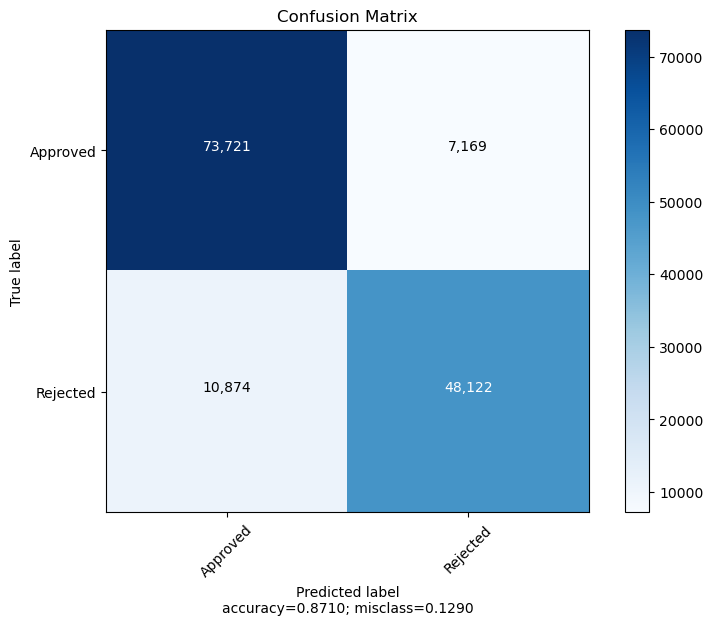

In [57]:
from sklearn.linear_model import LogisticRegression

# Define the modell
model_logistic = LogisticRegression(max_iter=1000)

# Training, testing, and evaluation model
accuracy, precision, recall, f1, _, _, _, _ = train_test_evaluate_model(model_logistic, X_train, X_test, y_train, y_test)

Training is success!
Accuracy: 1.00, Precision: 1.00, Recall: 1.00, F1-score: 1.00
ROC AUC: 0.9999
KS: 0.9989 (p-value: 0.000e+00)
Classification report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     80890
           1       1.00      1.00      1.00     58996

    accuracy                           1.00    139886
   macro avg       1.00      1.00      1.00    139886
weighted avg       1.00      1.00      1.00    139886



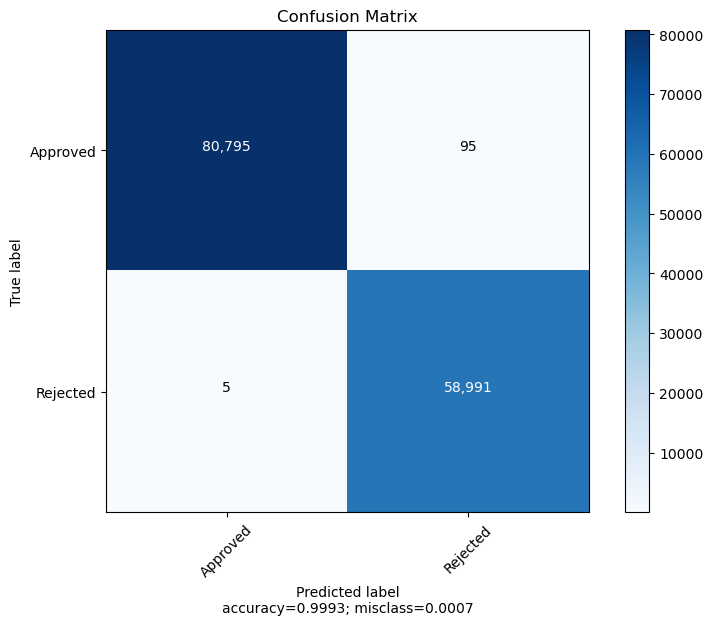

In [140]:
from sklearn.ensemble import GradientBoostingClassifier

# Inisialisasi model Gradient Boosting Classifier
model_GBC = GradientBoostingClassifier()

# Train, test, dan evaluasi model Gradient Boosting Classifier
accuracy, precision, recall, f1, _, _, _, _ = train_test_evaluate_model(model_GBC, X_train, X_test, y_train, y_test)


## Random Forest

Training is success!
Accuracy: 1.00, Precision: 1.00, Recall: 1.00, F1-score: 1.00
ROC AUC: 0.9999
KS: 0.9988 (p-value: 0.000e+00)
Classification report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     80890
           1       1.00      1.00      1.00     58996

    accuracy                           1.00    139886
   macro avg       1.00      1.00      1.00    139886
weighted avg       1.00      1.00      1.00    139886



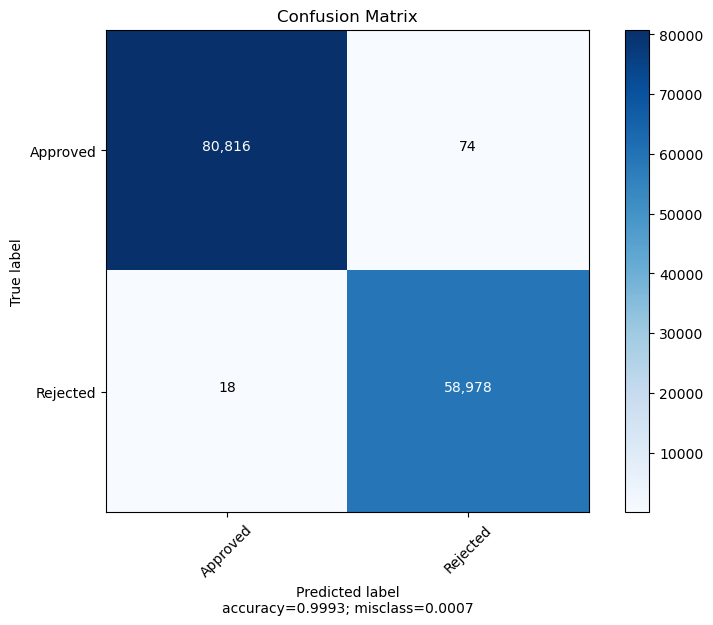

In [48]:
from sklearn.ensemble import RandomForestClassifier

# Initialize the Random Forest model
model_RF = RandomForestClassifier(random_state=42)

# Train, test, and evaluate the model
accuracy, precision, recall, f1, _, _, _, _ = train_test_evaluate_model(model_RF, X_train, X_test, y_train, y_test)


## Naive Bayes

Training is success!
Accuracy: 0.47, Precision: 0.44, Recall: 0.99, F1-score: 0.61
ROC AUC: 0.8899
KS: 0.6530 (p-value: 0.000e+00)
Classification report:
               precision    recall  f1-score   support

           0       0.93      0.09      0.16     80890
           1       0.44      0.99      0.61     58996

    accuracy                           0.47    139886
   macro avg       0.69      0.54      0.39    139886
weighted avg       0.73      0.47      0.35    139886



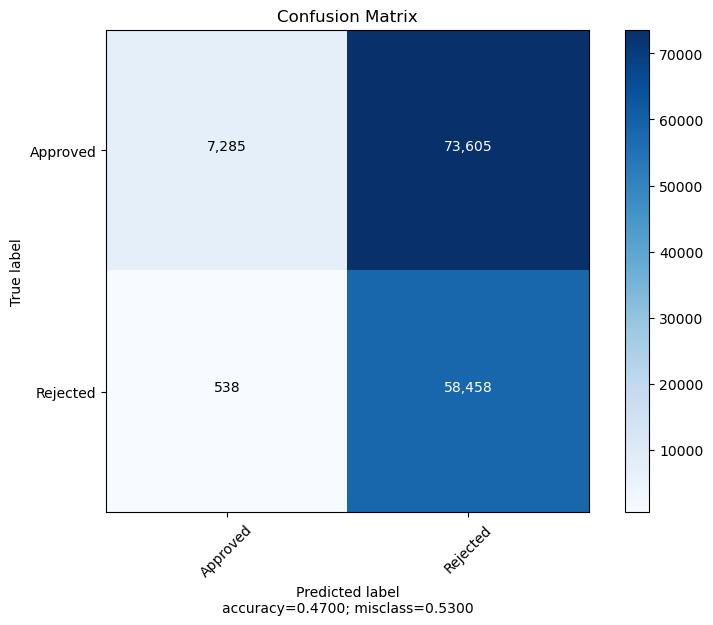

In [49]:
from sklearn.naive_bayes import GaussianNB

# Inisialisasi model Naive Bayes
model_nb = GaussianNB()

# Latih, uji, dan evaluasi model
accuracy, precision, recall, f1, _, _, _, _ = train_test_evaluate_model(model_nb, X_train, X_test, y_train, y_test)


## Multinomial Naive Bayes

Training is success!
Accuracy: 0.56, Precision: 0.48, Recall: 0.53, F1-score: 0.51
ROC AUC: 0.5619
KS: 0.1156 (p-value: 0.000e+00)
Classification report:
               precision    recall  f1-score   support

           0       0.63      0.58      0.61     80890
           1       0.48      0.53      0.51     58996

    accuracy                           0.56    139886
   macro avg       0.56      0.56      0.56    139886
weighted avg       0.57      0.56      0.56    139886



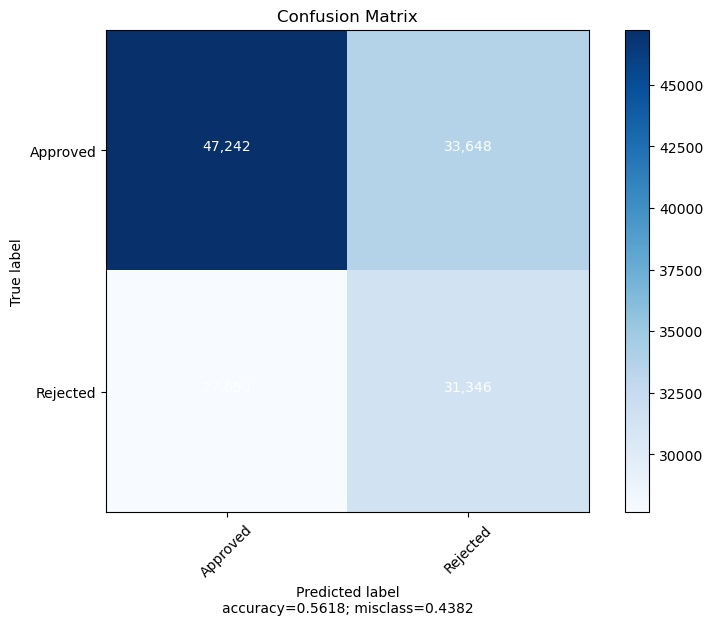

In [50]:
from sklearn.naive_bayes import MultinomialNB

# Define the model
model_mnb = MultinomialNB()

# Latih, uji, dan evaluasi model
accuracy, precision, recall, f1, _, _, _, _ = train_test_evaluate_model(model_mnb, X_train, X_test, y_train, y_test)


Training is success!
Accuracy: 0.67, Precision: 0.58, Recall: 0.82, F1-score: 0.67
ROC AUC: 0.7588
KS: 0.4102 (p-value: 0.000e+00)
Classification report:
               precision    recall  f1-score   support

           0       0.81      0.56      0.66     80890
           1       0.58      0.82      0.67     58996

    accuracy                           0.67    139886
   macro avg       0.69      0.69      0.67    139886
weighted avg       0.71      0.67      0.67    139886



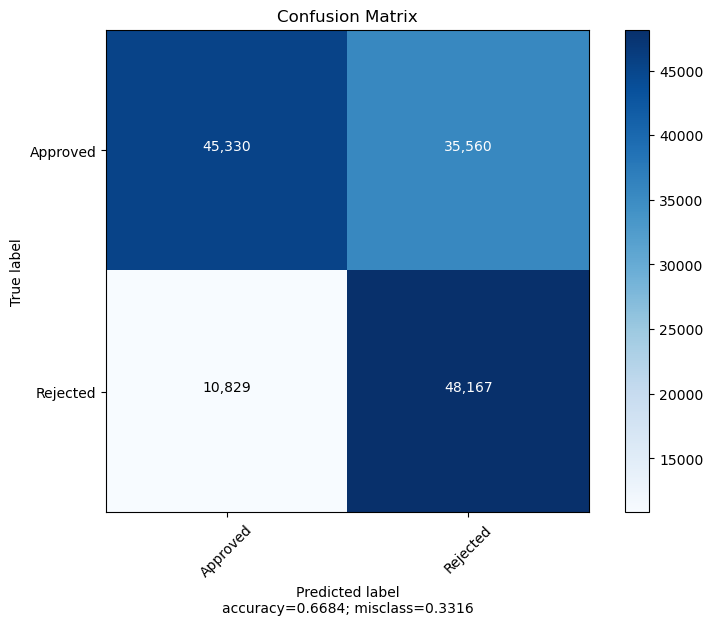

In [231]:
from sklearn.ensemble import VotingClassifier

# Inisialisasi model Logistic Regression
model_LR = LogisticRegression(solver='lbfgs',max_iter=1000)

# Inisialisasi model Multinomial Naive Bayes
model_MNB = MultinomialNB()

# Inisialisasi model Naive Bayes
model_nb = GaussianNB()

# Inisialisasi model Voting Classifier
voting_model = VotingClassifier(
    estimators=[('lr', model_LR), ('mnb', model_MNB), ('nb', model_nb)],
    voting='soft'
)

# Training, testing, dan evaluasi model Voting Classifier
accuracy, precision, recall, f1, _, _, _, _ = train_test_evaluate_model(voting_model, X_train, X_test, y_train, y_test)


# Tuning Hyperparameter

Training is success!
Accuracy: 0.83, Precision: 0.84, Recall: 0.73, F1-score: 0.78
ROC AUC: 0.9139
KS: 0.6656 (p-value: 0.000e+00)
Classification report:
               precision    recall  f1-score   support

           0       0.82      0.90      0.86     80890
           1       0.84      0.73      0.78     58996

    accuracy                           0.83    139886
   macro avg       0.83      0.81      0.82    139886
weighted avg       0.83      0.83      0.82    139886



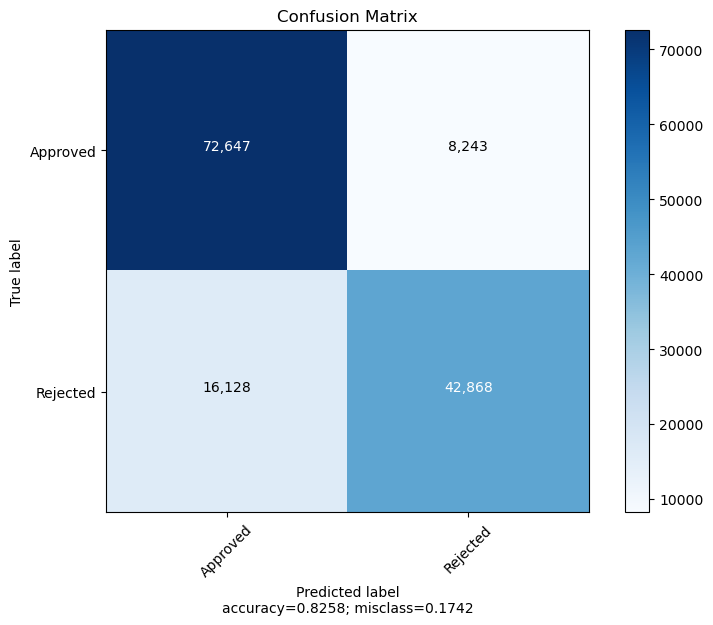

In [75]:
from sklearn.linear_model import LogisticRegression

# Define the model
model_logistic = LogisticRegression(solver='lbfgs', max_iter=2000, penalty='l2', C=0.38)

# Training, testing, and evaluation model
accuracy, precision, recall, f1, _, _, _, _ = train_test_evaluate_model(model_logistic, X_train, X_test, y_train, y_test)


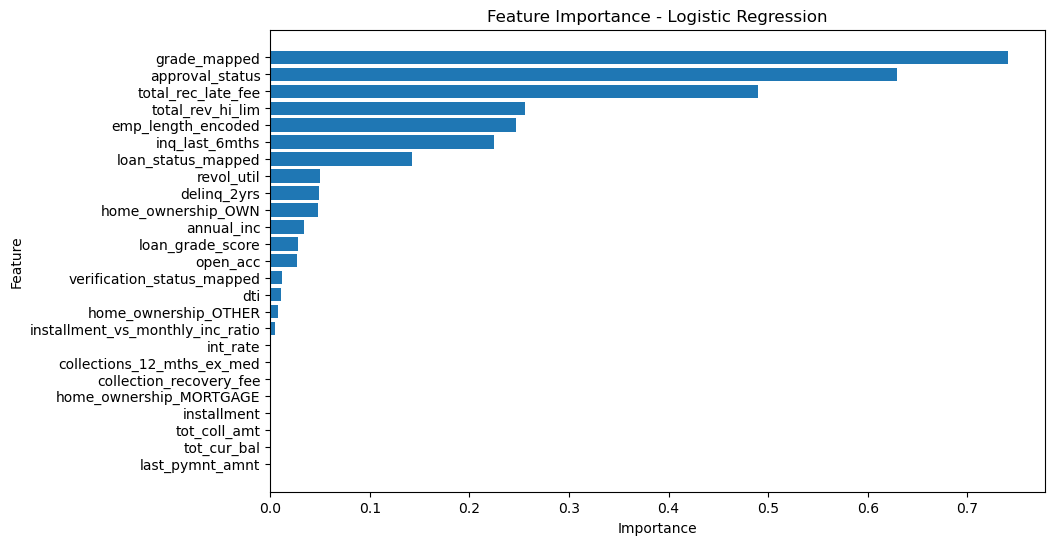

In [58]:
import matplotlib.pyplot as plt

# Get feature coefficients
feature_importance = abs(model_logistic.coef_[0])

# Get feature names
feature_names = selected_columns[:len(feature_importance)]

# Combine features and their importance values
feature_importance_sorted = sorted(zip(feature_names, feature_importance), key=lambda x: x[1])

# Separate sorted feature names and importance values
sorted_feature_names, sorted_feature_importance = zip(*feature_importance_sorted)

# Create the plot
plt.figure(figsize=(10, 6))
plt.barh(sorted_feature_names, sorted_feature_importance)
plt.xlabel("Importance")
plt.ylabel("Feature")
plt.title("Feature Importance - Logistic Regression")
plt.show()
